#  Importing modules and libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [84]:
oil = pd.read_excel('C:\\Users\\DELL\\OneDrive\\Desktop\\VIVEK DS PROJECTS\\Brent crude oil(daily).xlsx',index_col='Date',parse_dates=True)

In [5]:
oil

,Spot Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-12-13,80.14
2022-12-14,83.33
2022-12-15,82.34


# EDA

In [105]:
oil.index

DatetimeIndex(['1987-05-20', '1987-05-21', '1987-05-22', '1987-05-25',
               '1987-05-26', '1987-05-27', '1987-05-28', '1987-05-29',
               '1987-06-01', '1987-06-02',
               ...
               '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09',
               '2022-12-12', '2022-12-13', '2022-12-14', '2022-12-15',
               '2022-12-16', '2022-12-19'],
              dtype='datetime64[ns]', name='Date', length=9034, freq=None)

In [10]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9034 entries, 1987-05-20 to 2022-12-19
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Spot Price  9034 non-null   float64
dtypes: float64(1)
memory usage: 141.2 KB


In [12]:
oil.describe()

,Spot Price
count,9034.000000
mean,48.513844
std,32.872174
min,9.100000
25%,19.050000
50%,39.030000
75%,70.520000
max,143.950000


In [13]:
oil.shape

(9034, 1)

In [14]:
oil.columns

Index(['Spot Price'], dtype='object')

In [20]:
oil.isnull().sum()

Spot Price    0
dtype: int64

## TIME RESAMPLING

In [27]:
# Yearly Means
oil.resample(rule='BA').mean()

,Spot Price
Date,
1987-12-31,18.525813
1988-12-30,14.905412
1989-12-29,18.228228
1990-12-31,23.761445
1991-12-31,20.041128
1992-12-31,19.319728
1993-12-31,17.013413
1994-12-30,15.856389
1995-12-29,17.015850


In [25]:
# Monthly Means
oil.resample(rule='BM').mean()

,Spot Price
Date,
1987-05-29,18.580000
1987-06-30,18.860476
1987-07-31,19.856522
1987-08-31,18.979524
1987-09-30,18.313182
...,...
2022-08-31,100.446364
2022-09-30,89.764762
2022-10-31,93.331905


### PLOTTING

<AxesSubplot:xlabel='Date'>

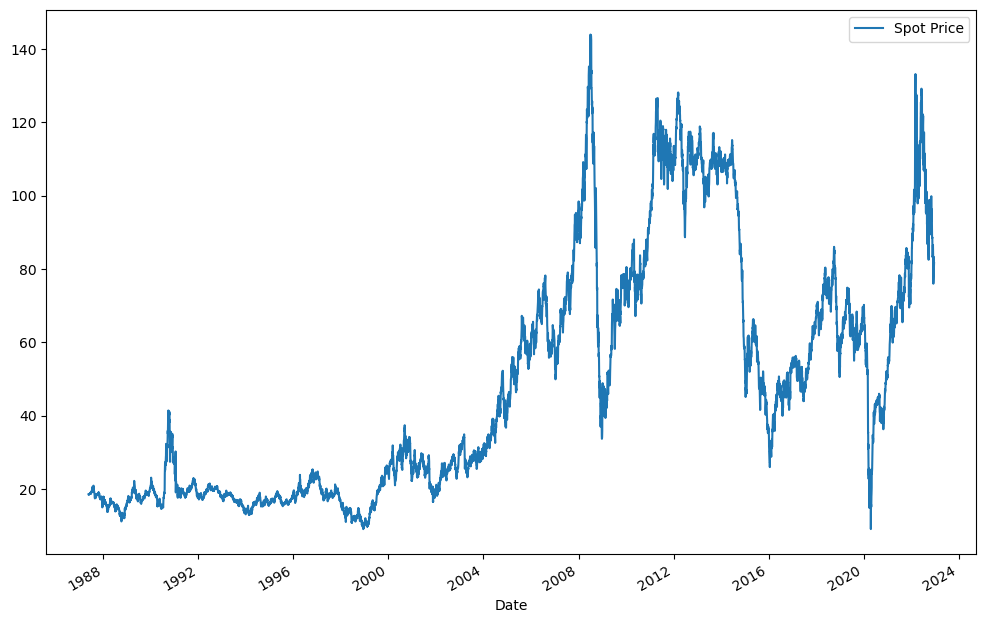

In [77]:
oil.plot(figsize=(12,8))

<AxesSubplot:title={'center':'Yearly mean Prices of Oil'}, xlabel='Date'>

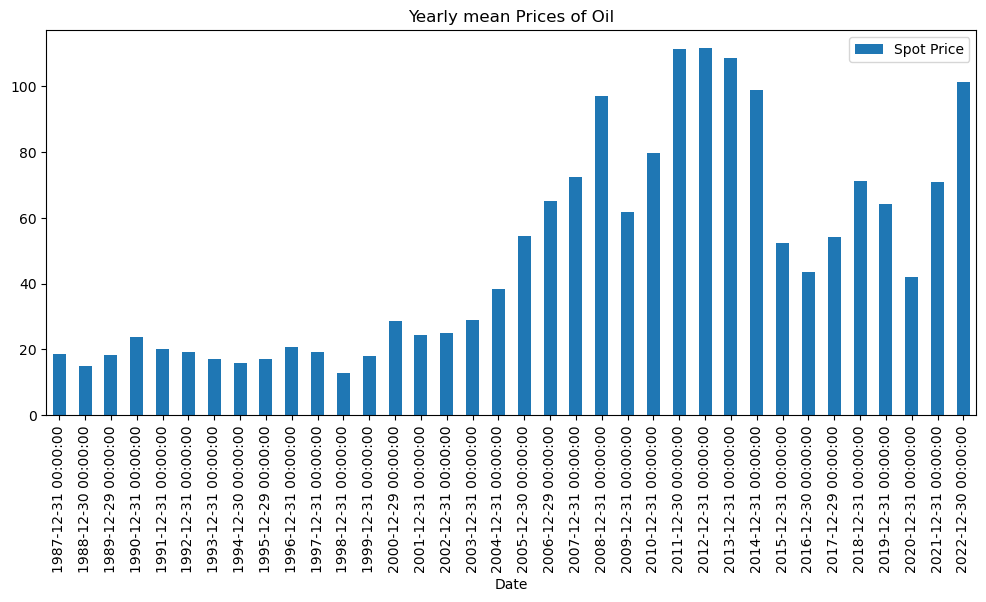

In [36]:
oil.resample(rule='BA').mean().plot.bar(title='Yearly mean Prices of Oil',figsize=(12,5))

## Time Shifting

In [40]:
oil.head()

,Spot Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [41]:
oil.tail()

,Spot Price
Date,
2022-12-13,80.14
2022-12-14,83.33
2022-12-15,82.34
2022-12-16,80.20
2022-12-19,81.66


#### Shift() Forward

In [43]:
oil.shift(1).head()

,Spot Price
Date,
1987-05-20,NaN
1987-05-21,18.63
1987-05-22,18.45
1987-05-25,18.55
1987-05-26,18.60


#### Shift() Backwards

In [45]:
oil.shift(-1).tail()

,Spot Price
Date,
2022-12-13,83.33
2022-12-14,82.34
2022-12-15,80.20
2022-12-16,81.66
2022-12-19,NaN


### Shifting based on Time Series Frequency Code

<AxesSubplot:xlabel='Date'>

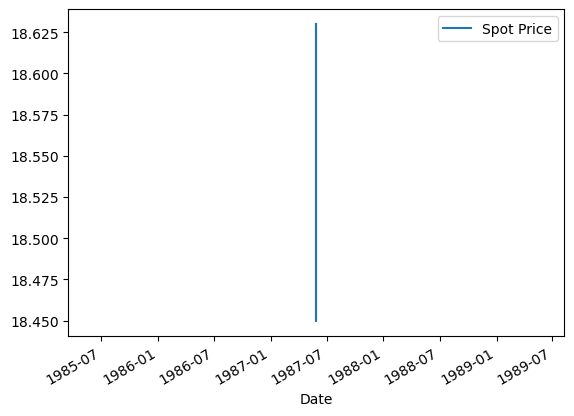

In [54]:
oil.shift(periods=1,freq='BM').head().plot()

<AxesSubplot:xlabel='Date'>

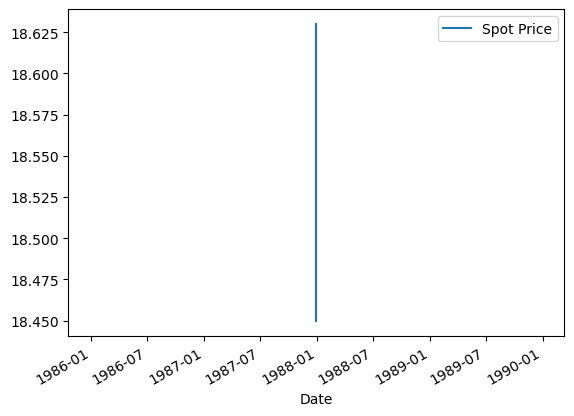

In [53]:
oil.shift(periods=1,freq='BA').head().plot()

## Rolling and Expanding¶

In [57]:
oil.rolling(window=7).mean().head(20)

,Spot Price
Date,
1987-05-20,NaN
1987-05-21,NaN
1987-05-22,NaN
1987-05-25,NaN
1987-05-26,NaN
1987-05-27,NaN
1987-05-28,18.580000
1987-05-29,18.572857
1987-06-01,18.601429


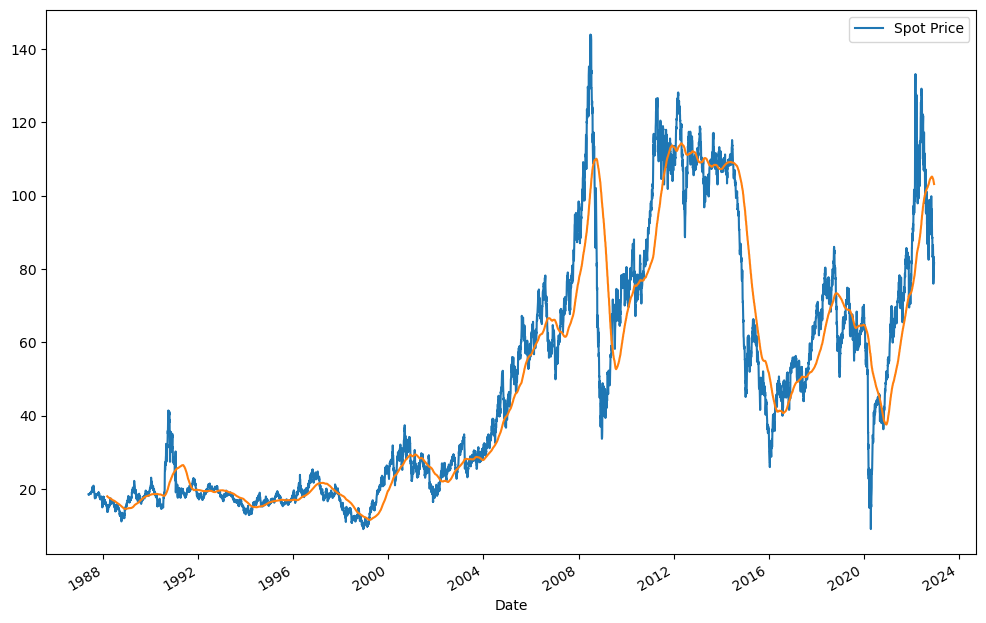

In [67]:
oil.plot(figsize=(12,8))
oil.rolling(window=200).mean()['Spot Price'].plot();

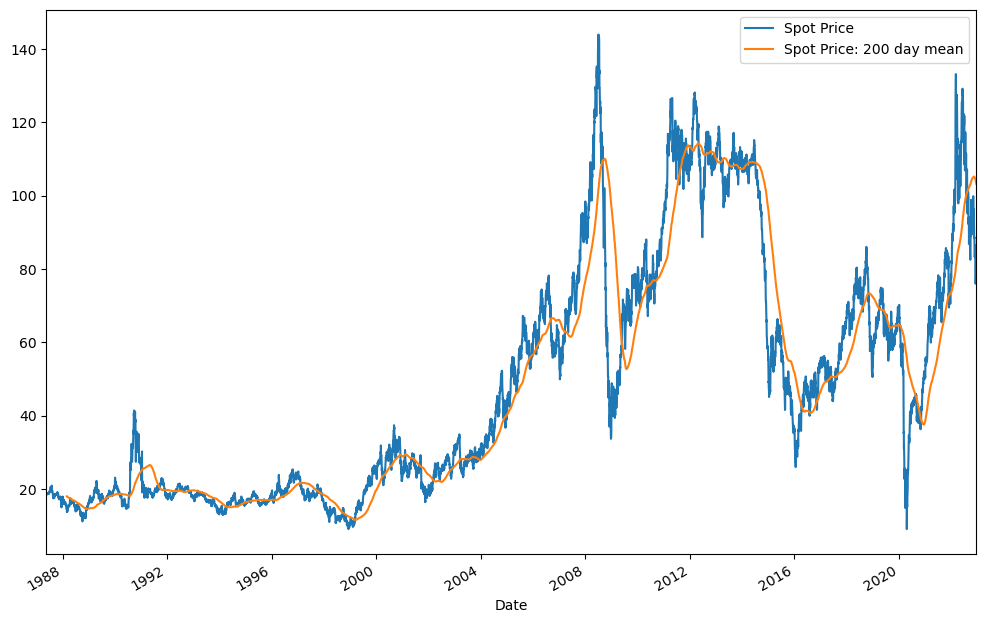

In [73]:
oil['Spot Price: 200 day mean'] = oil['Spot Price'].rolling(window=200).mean()
oil[['Spot Price','Spot Price: 200 day mean']].plot(figsize=(12,8)).autoscale(axis='x',tight=True)                                   

## Expanding

<AxesSubplot:xlabel='Date'>

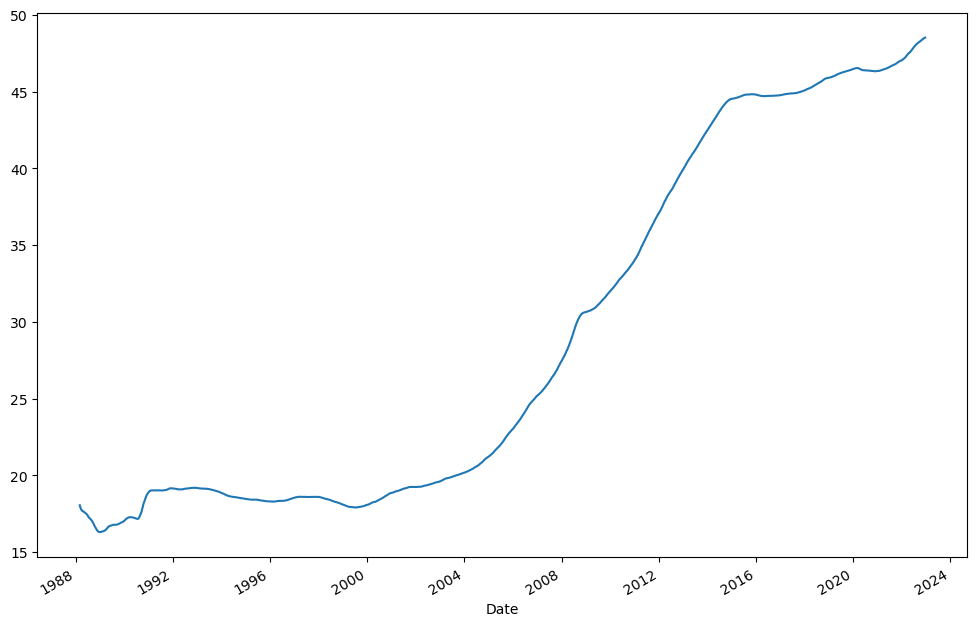

In [79]:
oil['Spot Price'].expanding(min_periods=200).mean().plot(figsize=(12,8))

## Visualizing Time Series Data

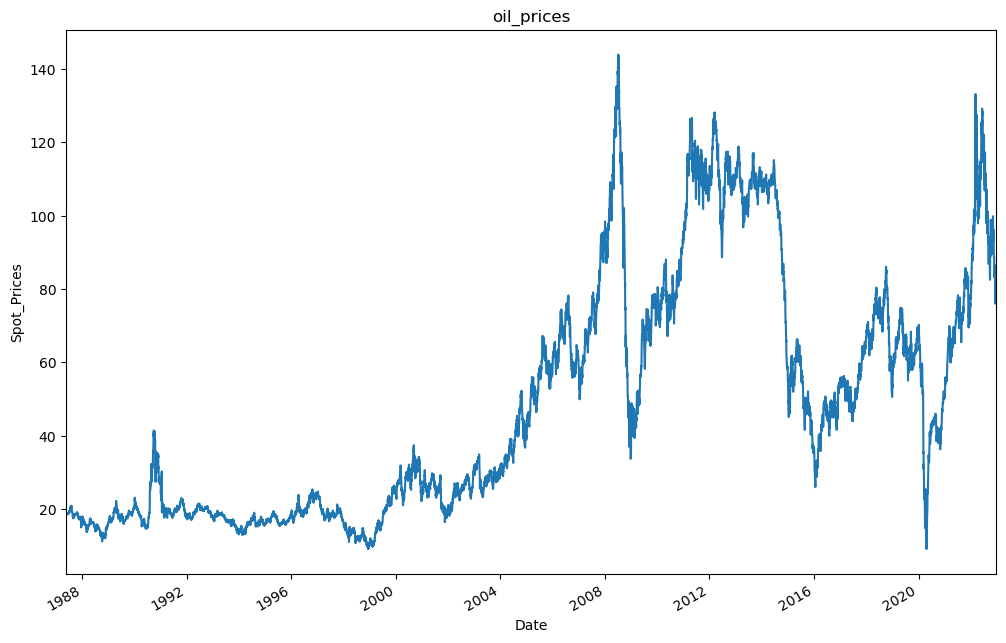

In [88]:
title = 'oil_prices'
x_label ='Date'
y_label= 'Spot_Prices'

ax = oil['Spot Price'].plot(figsize=(12,8),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=x_label,ylabel=y_label);

## Oil prices during COVID  Pandemic

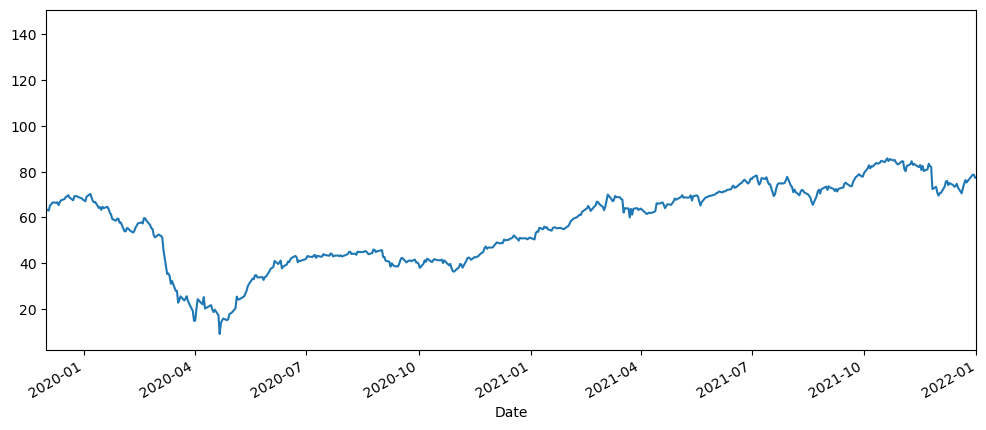

In [97]:
oil['Spot Price'].plot(figsize=(12,5),xlim=['2019-12-01','2022-01-01']);

In [94]:
#Min value in the range
oil.loc['2019-12-01':'2022-01-01'].min()

Spot Price    9.12
dtype: float64

In [95]:
#Max value in the range
oil.loc['2019-12-01':'2022-01-01'].max()

Spot Price    85.76
dtype: float64

<AxesSubplot:xlabel='Date'>

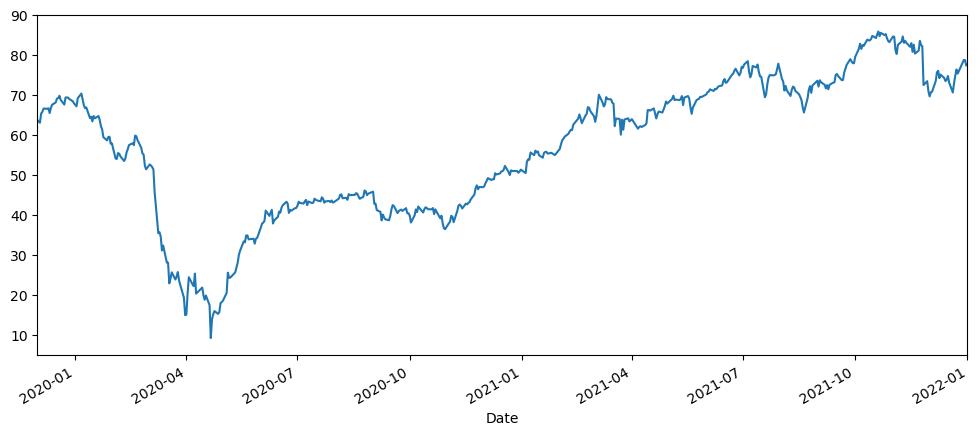

In [100]:
#Plugging above values in Y_limit values
oil['Spot Price'].plot(figsize=(12,5),xlim=['2019-12-01','2022-01-01'],ylim = [5,90])

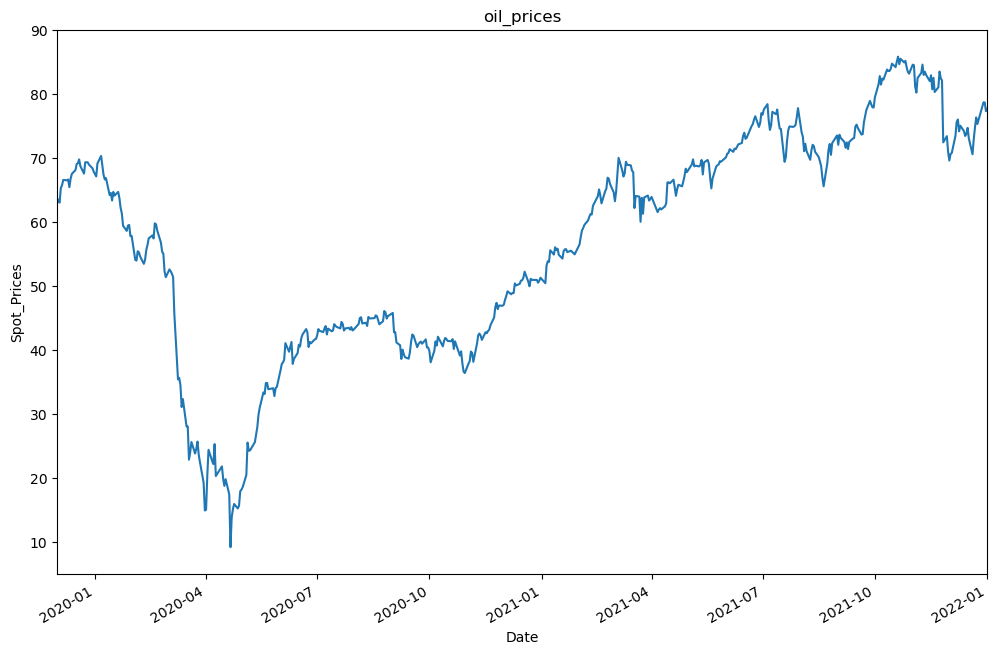

In [102]:
#Adding title,x_label and Y-label
title = 'oil_prices'
x_label ='Date'
y_label= 'Spot_Prices'

ax = oil['Spot Price'].plot(figsize=(12,8),xlim=['2019-12-01','2022-01-01'],ylim = [5,90],title=title)
ax.set(xlabel=x_label,ylabel=y_label);

## Date Formatting

In [114]:
from matplotlib import dates
from datetime import datetime

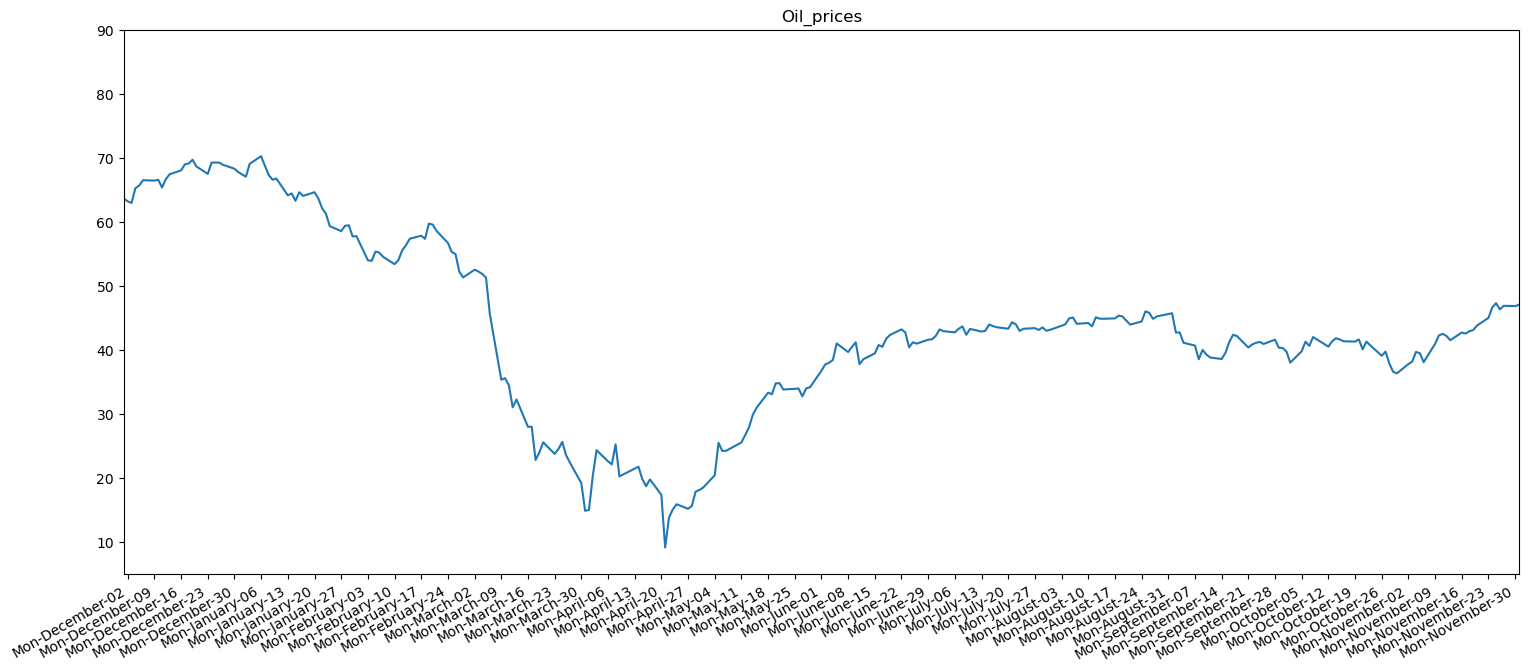

In [121]:
ax=oil['Spot Price'].plot(figsize=(18,8),xlim=['2019-12-01','2020-12-01'],ylim=[5,90],title='Oil_prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%d'))

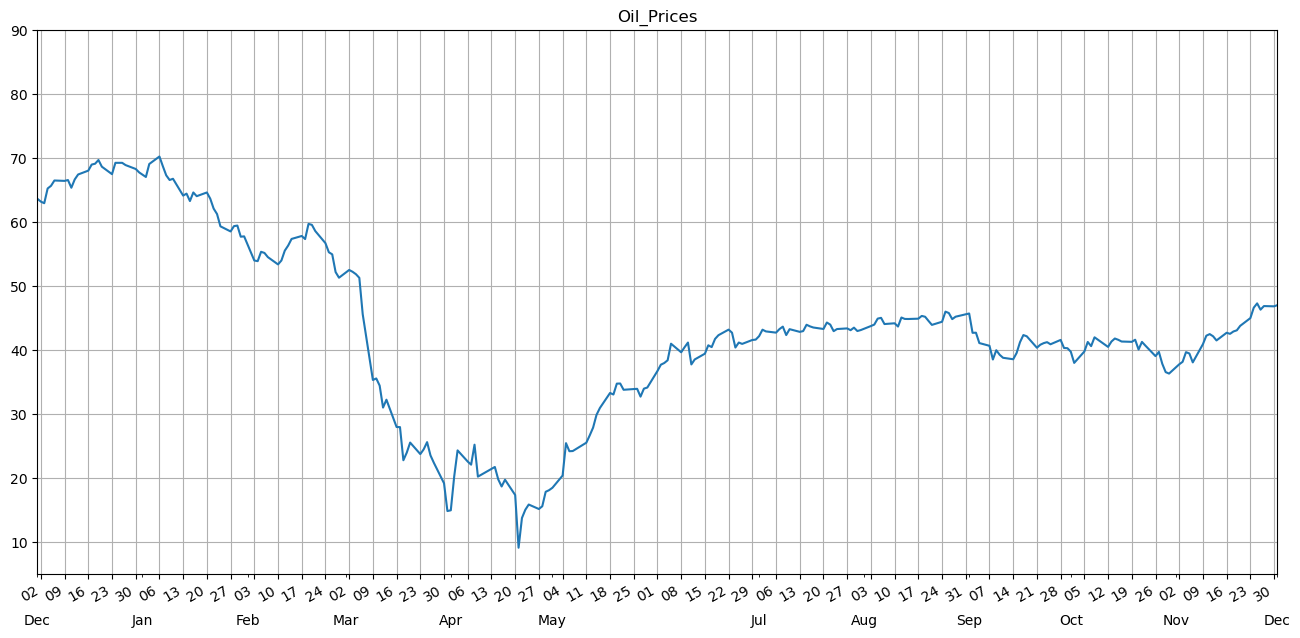

In [125]:
#Specific Date and month affecting oil prices during covid pandemic
ax= oil['Spot Price'].plot(figsize=(16,8),xlim=['2019-12-01','2020-12-01'],ylim=[5,90],title='Oil_Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)

# STATSMODELS

### Hodrick-Prescott filter method
This method gives us both Trend Component and Cyclical Component

In [126]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [127]:
#Tuple unpacking
oilprices_cycle,oilprices_trend = hpfilter(oil['Spot Price'],lamb=1600)

In [132]:
oilprices_cycle

Date
1987-05-20    0.118677
1987-05-21   -0.076670
1987-05-22    0.007908
1987-05-25    0.042386
1987-05-26    0.056733
                ...   
2022-12-13    0.174664
2022-12-14    3.751737
2022-12-15    3.139129
2022-12-16    1.371661
2022-12-19    3.202192
Name: Spot Price_cycle, Length: 9034, dtype: float64

In [130]:
oilprices_trend

Date
1987-05-20    18.511323
1987-05-21    18.526670
1987-05-22    18.542092
1987-05-25    18.557614
1987-05-26    18.573267
                ...    
2022-12-13    79.965336
2022-12-14    79.578263
2022-12-15    79.200871
2022-12-16    78.828339
2022-12-19    78.457808
Name: Spot Price_trend, Length: 9034, dtype: float64

In [133]:
type(oilprices_cycle)

pandas.core.series.Series

In [134]:
oil1= oil.copy()

In [135]:
oil1.head()

,Spot Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [136]:
oil1['trend'] = oilprices_trend

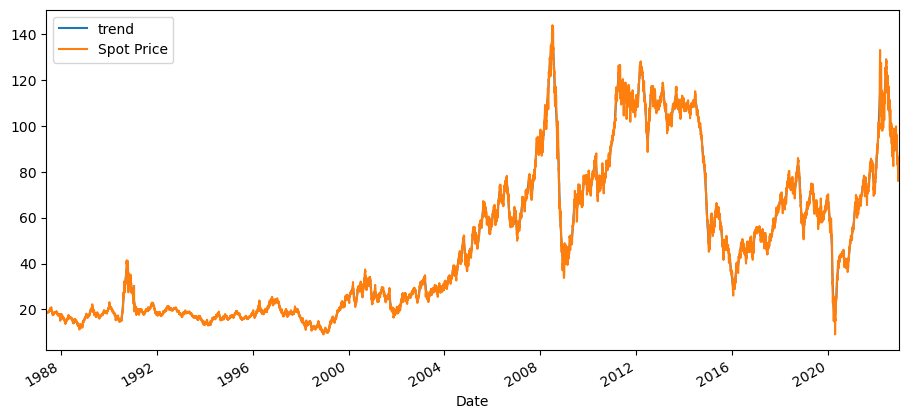

In [142]:
oil1[['trend','Spot Price']].plot(figsize=(11,5)).autoscale(axis='x',tight=True)

In [139]:
oil1['cycle']= oilprices_cycle

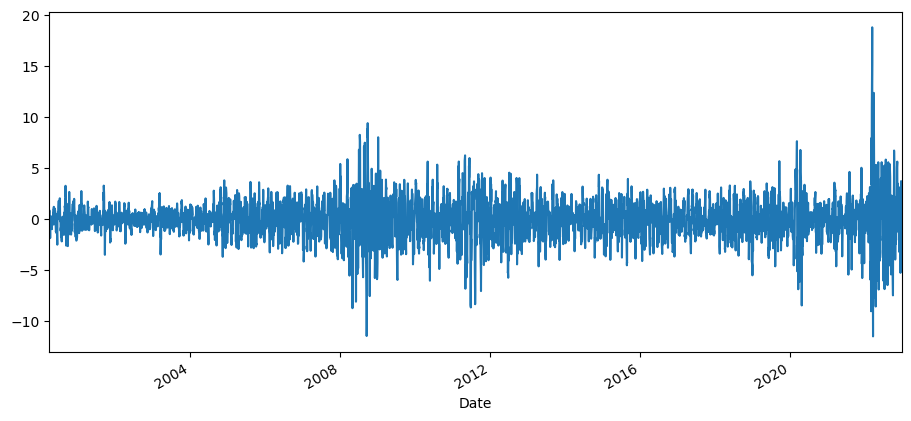

In [145]:
oil1['cycle']['2000-03-31':].plot(figsize=(11,5)).autoscale(axis='x',tight=True)

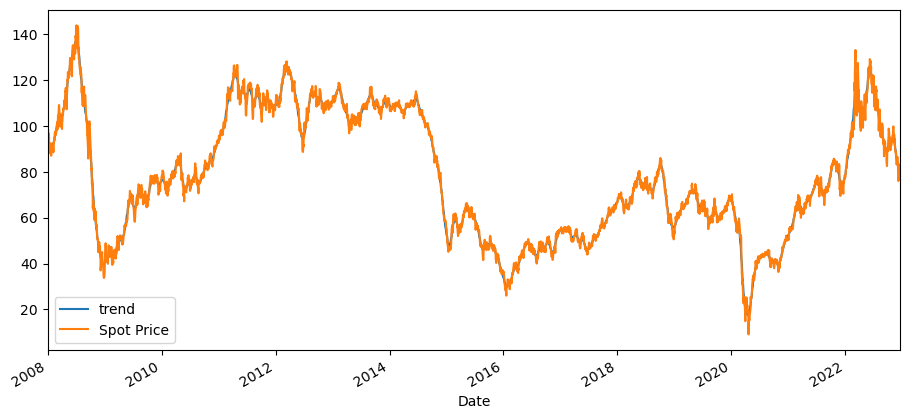

In [149]:
oil1[['trend','Spot Price']]['2007-12-31':].plot(figsize=(11,5)).autoscale(axis='x',tight=True)

# ETS-DECOMPOSITION

## Error/Trend/Seasonality Models

In [151]:
from statsmodels.tsa.seasonal import seasonal_decompose

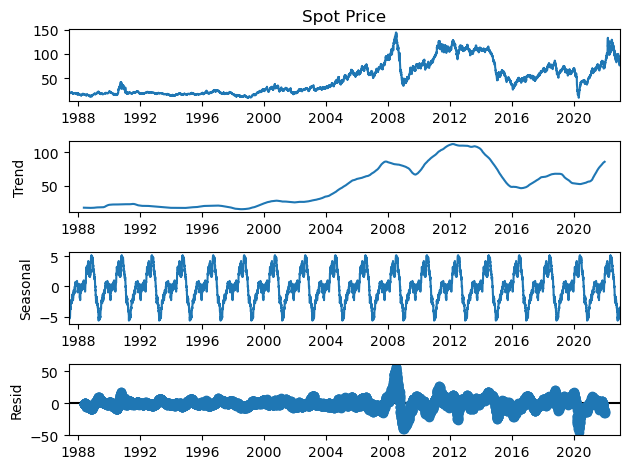

In [176]:
result = seasonal_decompose(oil1['Spot Price'],model='additive',period=500)
result.plot();

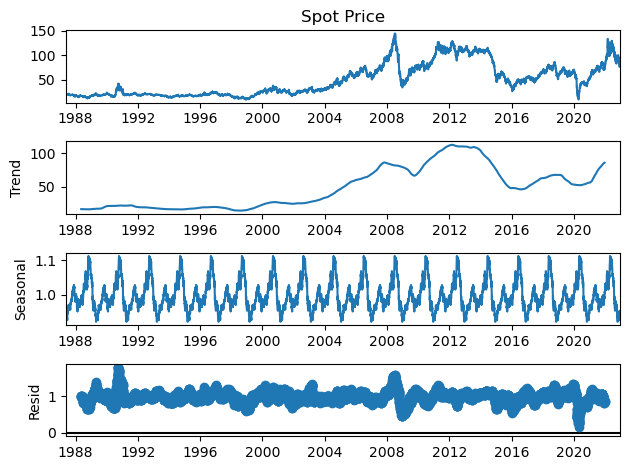

In [175]:
result = seasonal_decompose(oil1['Spot Price'],model='multiplicative',period=500)
result.plot();

#### We can use multiplicative model because our model is increasing or decreasing at a non-linear rate.

## EXPONENTIALLY WEIGHTED MOVING AVERAGE(EWMA)

In [198]:
oil1['EWMA12'] = oil1['Spot Price'].ewm(span=24,adjust=False).mean()

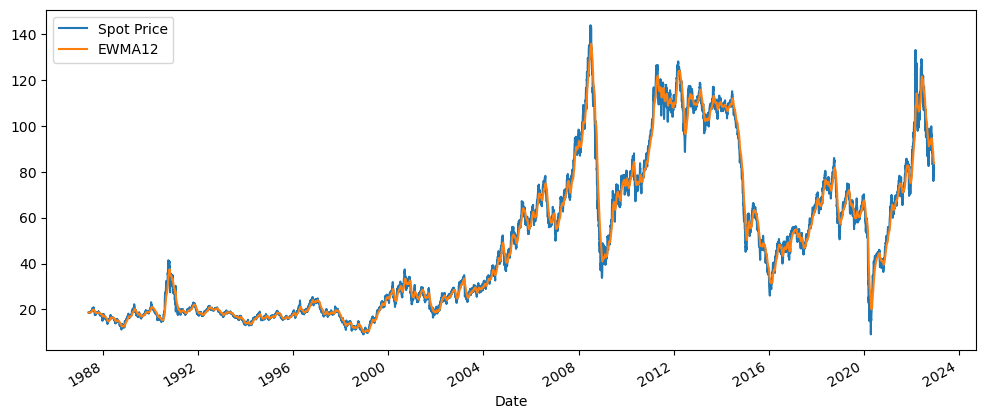

In [199]:
oil1[['Spot Price','EWMA12']].plot(figsize=(12,5));

# Holt-Winters Methods 

## SIMPLE EXPONENIAL SMOOTHENING

In [204]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 24
alpha= 2/(span+1)

oil1['EWMA24'] = oil1['Spot Price'].ewm(alpha=alpha,adjust=False).mean()
oil1['SES24']  = SimpleExpSmoothing(oil1['Spot Price']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
oil1.head()

,Spot Price,trend,cycle,EWMA24,EWMA12,SES24
Date,,,,,,
1987-05-20,18.63,18.511323,0.118677,18.630000,18.630000,18.630000
1987-05-21,18.45,18.526670,-0.076670,18.615600,18.615600,18.615600
1987-05-22,18.55,18.542092,0.007908,18.610352,18.610352,18.610352
1987-05-25,18.60,18.557614,0.042386,18.609524,18.609524,18.609524
1987-05-26,18.63,18.573267,0.056733,18.611162,18.611162,18.611162


## DOUBLE EXPONENTIAL SMOOTHING

In [228]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
oil1['DES24'] = ExponentialSmoothing(oil1['Spot Price'],trend='add').fit().fittedvalues.shift(-1)

In [229]:
oil1.head()

,Spot Price,trend,cycle,EWMA24,EWMA12,SES24,DES24
Date,,,,,,,
1987-05-20,18.63,18.511323,0.118677,18.630000,18.630000,18.630000,18.637114
1987-05-21,18.45,18.526670,-0.076670,18.615600,18.615600,18.615600,18.457114
1987-05-22,18.55,18.542092,0.007908,18.610352,18.610352,18.610352,18.557114
1987-05-25,18.60,18.557614,0.042386,18.609524,18.609524,18.609524,18.607114
1987-05-26,18.63,18.573267,0.056733,18.611162,18.611162,18.611162,18.637114


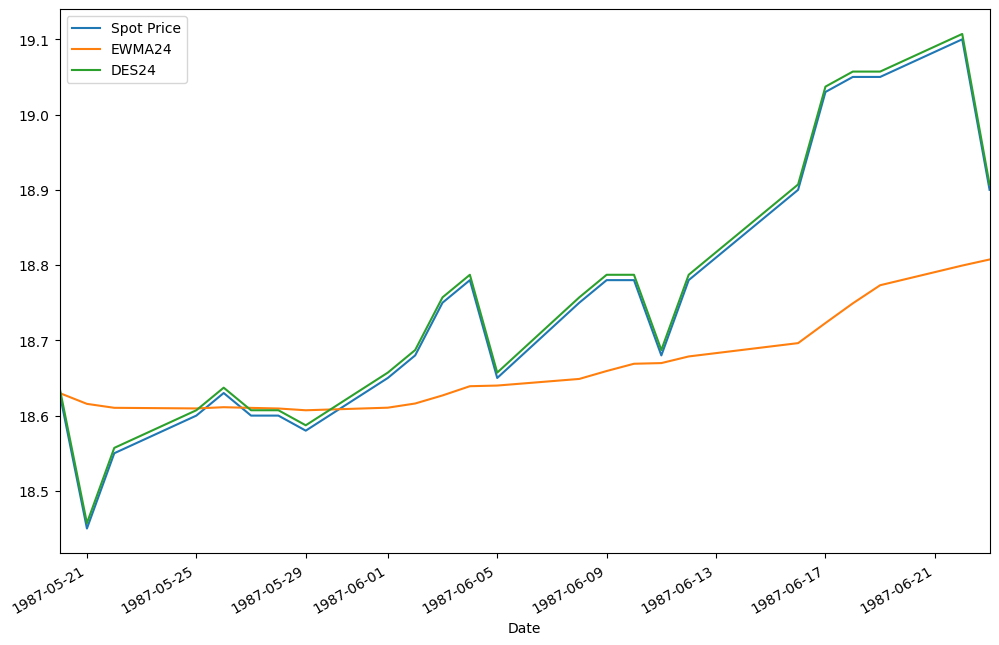

In [215]:
oil1[['Spot Price','EWMA24','DES24']].iloc[:24].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

In [239]:
oil1['DESmul24'] = ExponentialSmoothing(oil1['Spot Price'],trend='mul').fit().fittedvalues.shift(-1)

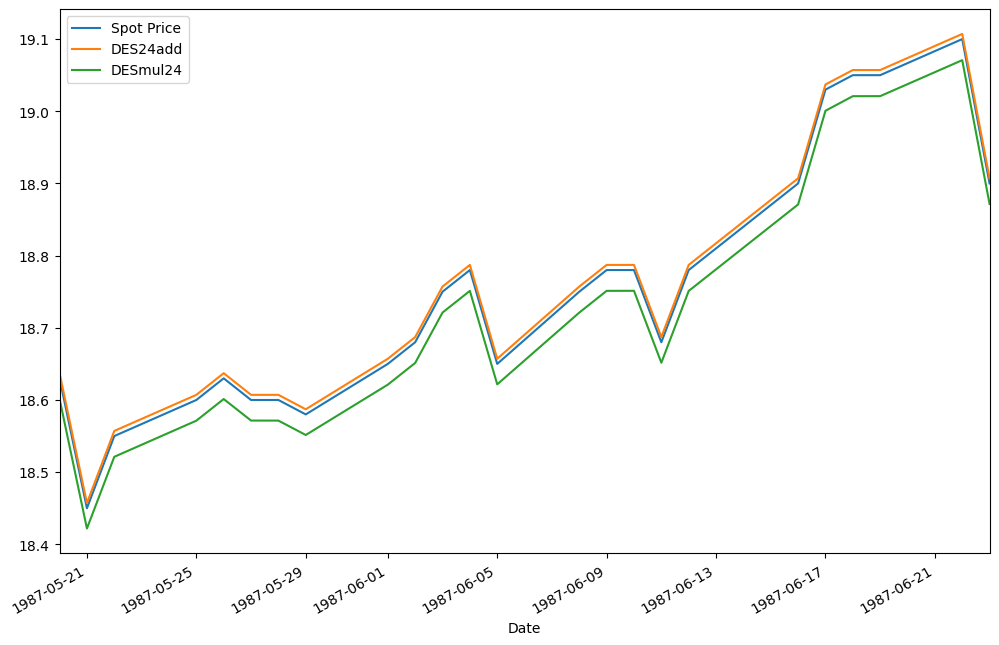

In [242]:
oil1[['Spot Price','DES24add','DESmul24']].iloc[:24].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

## Triple Exponential Smoothing 

In [244]:
oil1['TESadd24'] = ExponentialSmoothing(oil1['Spot Price'],trend='add',seasonal='add',seasonal_periods=24).fit().fittedvalues
oil1.head()

,Spot Price,trend,cycle,EWMA24,EWMA12,SES24,DES24add,DESmul24,TESadd24
Date,,,,,,,,,
1987-05-20,18.63,18.511323,0.118677,18.630000,18.630000,18.630000,18.637114,18.601356,18.656054
1987-05-21,18.45,18.526670,-0.076670,18.615600,18.615600,18.615600,18.457114,18.421953,18.540757
1987-05-22,18.55,18.542092,0.007908,18.610352,18.610352,18.610352,18.557114,18.521273,18.586565
1987-05-25,18.60,18.557614,0.042386,18.609524,18.609524,18.609524,18.607114,18.571312,18.600604
1987-05-26,18.63,18.573267,0.056733,18.611162,18.611162,18.611162,18.637114,18.601319,18.559649


In [247]:
oil1['TESmul24'] = ExponentialSmoothing(oil1['Spot Price'],trend='mul',seasonal='mul',seasonal_periods=24).fit().fittedvalues
oil1

,Spot Price,trend,cycle,EWMA24,EWMA12,SES24,DES24add,DESmul24,TESadd24,TESmul24
Date,,,,,,,,,,
1987-05-20,18.63,18.511323,0.118677,18.630000,18.630000,18.630000,18.637114,18.601356,18.656054,18.634122
1987-05-21,18.45,18.526670,-0.076670,18.615600,18.615600,18.615600,18.457114,18.421953,18.540757,18.596975
1987-05-22,18.55,18.542092,0.007908,18.610352,18.610352,18.610352,18.557114,18.521273,18.586565,18.519997
1987-05-25,18.60,18.557614,0.042386,18.609524,18.609524,18.609524,18.607114,18.571312,18.600604,18.561616
1987-05-26,18.63,18.573267,0.056733,18.611162,18.611162,18.611162,18.637114,18.601319,18.559649,18.575490
...,...,...,...,...,...,...,...,...,...,...
2022-12-13,80.14,79.965336,0.174664,84.428311,84.428311,84.428311,80.147114,80.156402,77.882425,77.818790
2022-12-14,83.33,79.578263,3.751737,84.340446,84.340446,84.340446,83.337114,83.345875,80.197259,80.250364
2022-12-15,82.34,79.200871,3.139129,84.180410,84.180410,84.180410,82.347114,82.363700,83.441811,83.466772


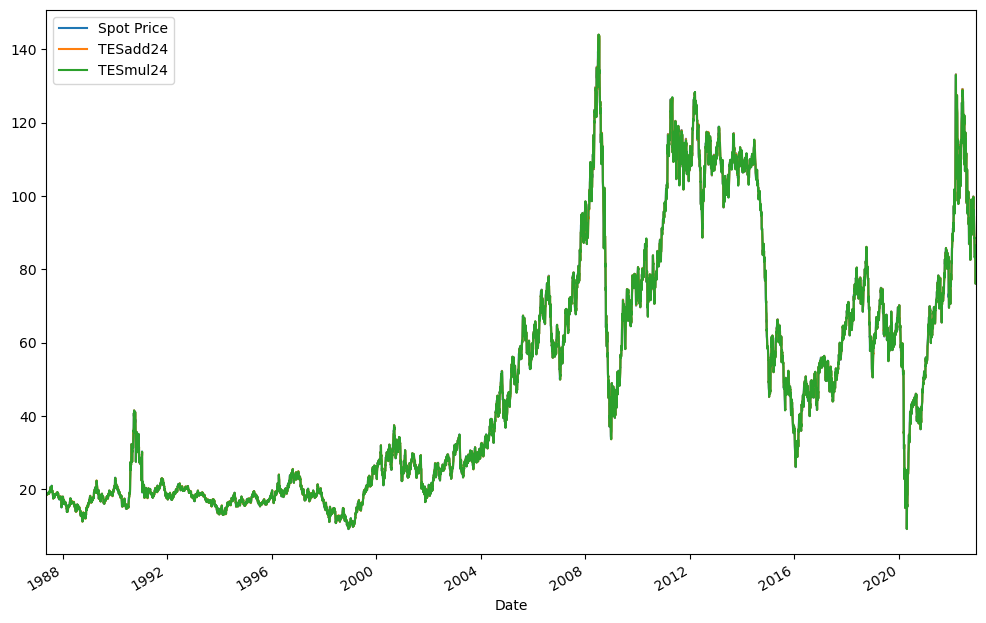

In [250]:
oil1[['Spot Price','TESadd24','TESmul24']].plot(figsize=(12,8)).autoscale(axis='x',tight=True)

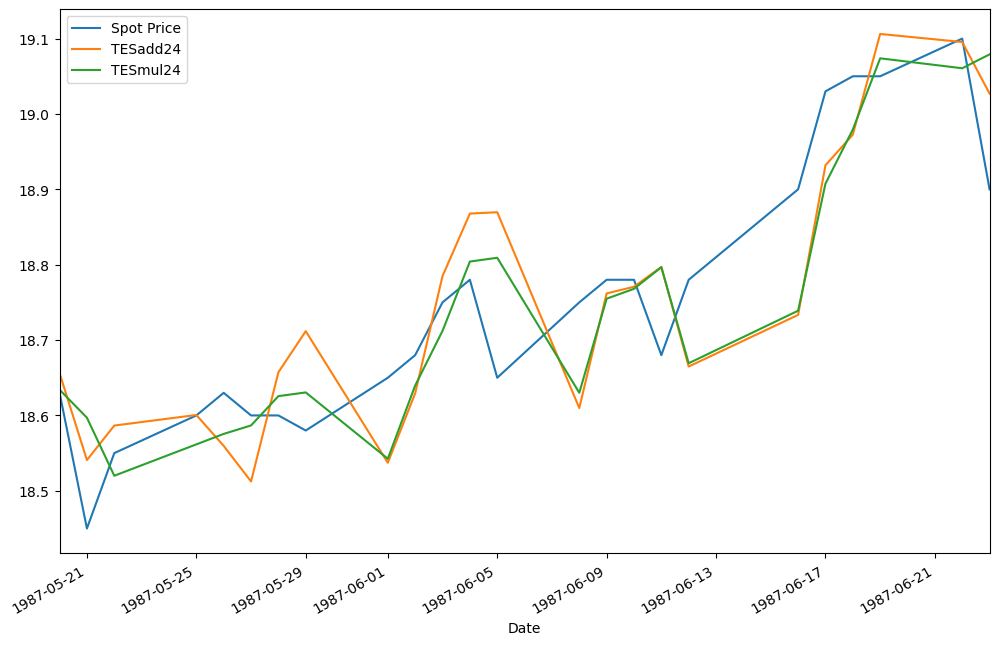

In [254]:
oil1[['Spot Price','TESadd24','TESmul24']].iloc[:24].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

# Forecasting with the Holt-Winters Method

In [350]:
oil2 =oil.copy()

In [352]:
oil2=oil2.resample('MS').last()
oil2

,Spot Price
Date,
1987-05-01,18.58
1987-06-01,19.08
1987-07-01,20.03
1987-08-01,18.63
1987-09-01,18.48
...,...
2022-08-01,96.55
2022-09-01,88.90
2022-10-01,93.30


In [353]:
#5 years for test data
len(oil2)-(60)

368

In [354]:
#Train_Test_Split
train_data = oil2.iloc[:368]
test_data = oil2.iloc[368:]

In [355]:
#Fitting the Model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Spot Price'],trend='mul',seasonal='mul',seasonal_periods=24).fit()

### EVALUATING MODEL AGAINST TEST_SET

In [356]:
test_predictions = fitted_model.forecast(60).rename('HW Forecast')

In [357]:
test_predictions

2018-01-01    65.951054
2018-02-01    69.682855
2018-03-01    70.548492
2018-04-01    73.113148
2018-05-01    71.784638
2018-06-01    72.986926
2018-07-01    71.222285
2018-08-01    70.026446
2018-09-01    66.419580
2018-10-01    59.979447
2018-11-01    58.462796
2018-12-01    56.081999
2019-01-01    57.444709
2019-02-01    60.183057
2019-03-01    60.357208
2019-04-01    61.412230
2019-05-01    60.590624
2019-06-01    60.624692
2019-07-01    62.677047
2019-08-01    63.697558
2019-09-01    61.110962
2019-10-01    63.166397
2019-11-01    63.700667
2019-12-01    63.864974
2020-01-01    63.119472
2020-02-01    66.691050
2020-03-01    67.519521
2020-04-01    69.974064
2020-05-01    68.702593
2020-06-01    69.853262
2020-07-01    68.164385
2020-08-01    67.019889
2020-09-01    63.567882
2020-10-01    57.404254
2020-11-01    55.952720
2020-12-01    53.674141
2021-01-01    54.978344
2021-02-01    57.599122
2021-03-01    57.765796
2021-04-01    58.775521
2021-05-01    57.989190
2021-06-01    58

<AxesSubplot:xlabel='Date'>

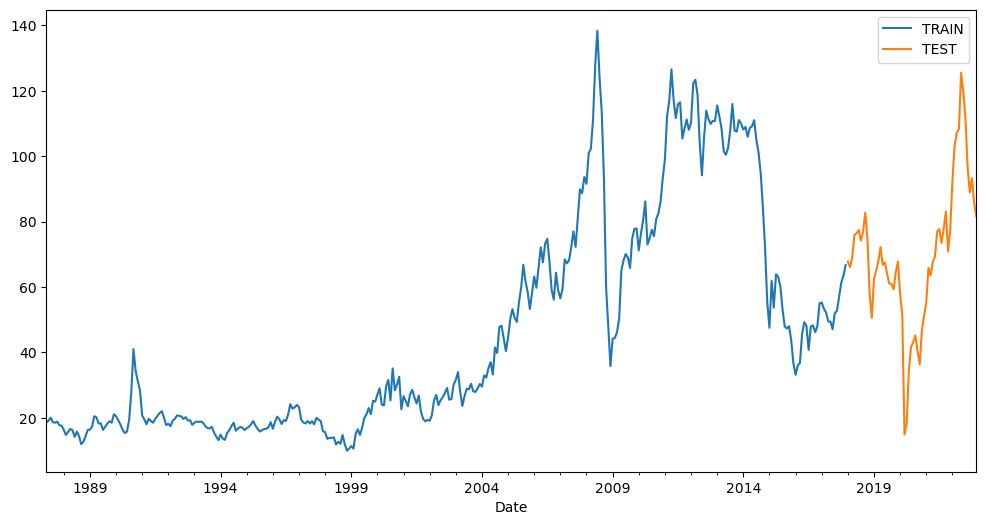

In [358]:
train_data['Spot Price'].plot(legend=True,label='TRAIN')
test_data['Spot Price'].plot(legend=True,label='TEST',figsize=(12,6))

<AxesSubplot:xlabel='Date'>

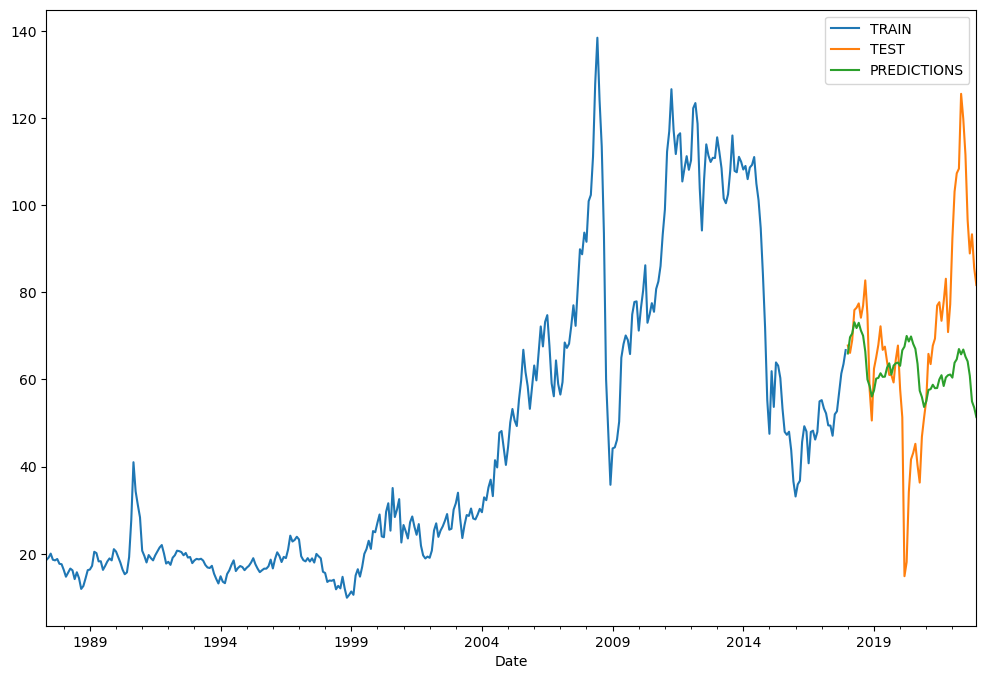

In [359]:
train_data['Spot Price'].plot(legend=True,label='TRAIN')
test_data['Spot Price'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTIONS')

In [301]:
oil2 = oil1.resample("BM").last()

### Evaluation Metrics

In [360]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [361]:
mean_absolute_error(test_data,test_predictions)

17.301896134656918

In [362]:
mean_squared_error(test_data,test_predictions)

552.2238273221263

In [364]:
oil2['Spot Price'].mean()

48.71483644859815

# Autoregressive Integrated Moving Average - ARIMA(p,d,q)

### Using pmdarima.auto_arima to determine ARIMA Orders

In [400]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima

In [ ]:
auto_arima(oil2['Spot Price'],seasonal=False,stepwise=True).summary()

In [401]:
from pmdarima import auto_arima

model = auto_arima(oil2['Spot Price'], seasonal=False, stepwise=False)
order = model.get_params()['order']

arima_model = sm.tsa.arima.ARIMA(oil2['Spot Price'], order=order)
arima_model_fit = arima_model.fit()


print(arima_model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             Spot Price   No. Observations:                  428
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1327.945
Date:                Mon, 05 Jun 2023   AIC                           2663.890
Time:                        20:03:54   BIC                           2680.117
Sample:                    05-01-1987   HQIC                          2670.299
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1883      0.041     29.324      0.000       1.109       1.268
ar.L2         -0.2682      0.031     -8.551      0.000      -0.330      -0.207
ma.L1         -0.9492      0.036    -26.074      0.0

## Test For Stationarity

### Augmented Dickey Fuller Test

In [388]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

### Running ADF Test on First Difference

In [371]:
from statsmodels.tsa.statespace.tools import diff

In [389]:
oil2['d1'] = diff(oil2['Spot Price'],k_diff=1)

adf_test(oil2['d1'],'Oil Price Results')

Augmented Dickey-Fuller Test: Oil Price Results
ADF test statistic     -1.604905e+01
p-value                 5.801709e-29
# lags used             0.000000e+00
# observations          4.260000e+02
critical value (1%)    -3.445794e+00
critical value (5%)    -2.868349e+00
critical value (10%)   -2.570397e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


###  ACF and PACF plots

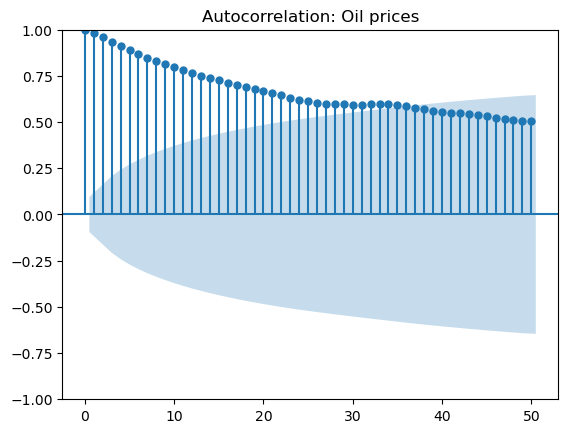

In [403]:
title = 'Autocorrelation: Oil prices'
lags=50
plot_acf(oil2['Spot Price'],title=title,lags=lags);

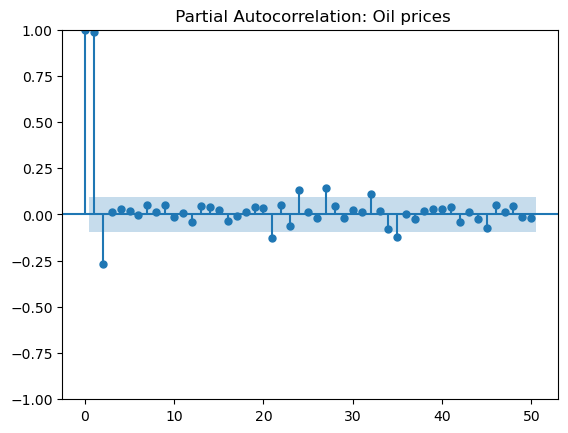

In [404]:
title = ' Partial Autocorrelation: Oil prices'
lags=50
plot_pacf(oil2['Spot Price'],title=title,lags=lags);

### Fitting an ARIMA(2,1,1) Model

In [406]:
len(oil2)-60

368

In [407]:
train = oil2.iloc[:368]
test = oil2.iloc[368:]

In [410]:
model = sm.tsa.arima.ARIMA(train['Spot Price'],order=(2,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Spot Price   No. Observations:                  368
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1099.102
Date:                Mon, 05 Jun 2023   AIC                           2206.203
Time:                        20:15:04   BIC                           2221.825
Sample:                    05-01-1987   HQIC                          2212.410
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1093      1.321      0.083      0.934      -2.479       2.698
ar.L2          0.0621      0.348      0.179      0.858      -0.620       0.744
ma.L1          0.1426      1.332      0.107      0.915      -2.468       2.754
sigma2        23.3730      1.032     22.653      0.000      21.351      25.395
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               336.85
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              11.04   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [414]:
start = len(train)
end = len(train)+len(test)-1
predictions = results.predict(start=start,end=end,dynamic=False,typ='levels').rename('ARIMA(2,1,1) Predictions')

In [412]:
train

,Spot Price,d1
Date,,
1987-05-01,18.58,NaN
1987-06-01,19.08,0.50
1987-07-01,20.03,0.95
1987-08-01,18.63,-1.40
1987-09-01,18.48,-0.15
...,...,...
2017-08-01,52.69,0.70
2017-09-01,57.02,4.33
2017-10-01,61.35,4.33


In [416]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Spot Price'][i]}")

predicted=67.57931201, expected=67.78
predicted=67.87078094, expected=66.08
predicted=67.95535866, expected=69.02
predicted=67.98269579, expected=75.92
predicted=67.99093383, expected=76.45
predicted=67.99353118, expected=77.44
predicted=67.99432645, expected=74.16
predicted=67.9945746 , expected=76.94
predicted=67.99465108, expected=82.72
predicted=67.99467485, expected=74.84
predicted=67.99468219, expected=57.71
predicted=67.99468447, expected=50.57
predicted=67.99468518, expected=62.46
predicted=67.99468539, expected=65.03
predicted=67.99468546, expected=67.93
predicted=67.99468548, expected=72.19
predicted=67.99468549, expected=66.78
predicted=67.99468549, expected=67.52
predicted=67.99468549, expected=64.07
predicted=67.99468549, expected=61.04
predicted=67.99468549, expected=60.99
predicted=67.99468549, expected=59.3
predicted=67.99468549, expected=64.5
predicted=67.99468549, expected=67.77
predicted=67.99468549, expected=57.77
predicted=67.99468549, expected=51.31
predicted=67.9

[Text(0.5, 0, ''), Text(0, 0.5, 'Spot Prices')]

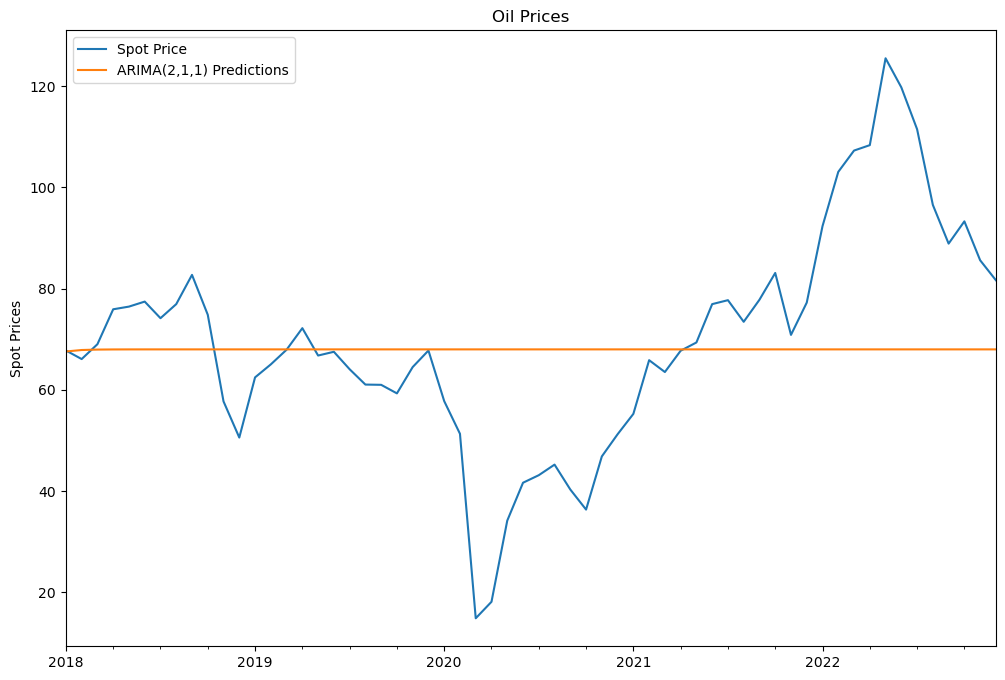

In [420]:
title = 'Oil Prices'
ylabel='Spot Prices'
xlabel='' 

ax = test['Spot Price'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

### Evaluate The Model

In [421]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Spot Price'], predictions)
print(f'ARIMA(2,1,1) MSE Error: {error:11.10}')

ARIMA(2,1,1) MSE Error: 475.5767592


In [423]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Spot Price'], predictions)
print(f'ARIMA(2,1,1) RMSE Error: {error:11.10}')

ARIMA(2,1,1) RMSE Error: 21.80772247


## Forecasting The Future

In [425]:
model = sm.tsa.arima.ARIMA(oil2['Spot Price'],order=(2,1,1))
results = model.fit()
fcast = results.predict(len(oil2),len(oil2)+23,typ='levels').rename('ARIMA(2,1,1) Forecast')

[Text(0.5, 0, ''), Text(0, 0.5, 'Spot Prices')]

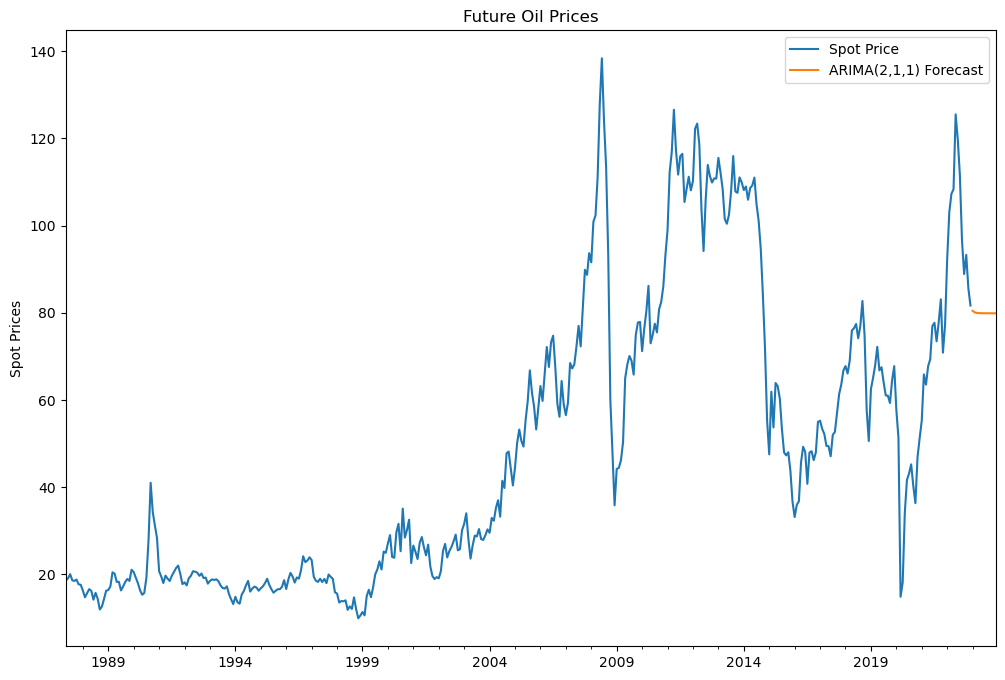

In [427]:
# Plotting predictions against known values
title = 'Future Oil Prices'
ylabel='Spot Prices'
xlabel='' 

ax = oil2['Spot Price'].plot(legend=True,figsize=(12,8),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

# SARIMA MODEL(p,d,q)(P,D,Q)m

### Running <tt>pmdarima.auto_arima</tt> to obtain recommended orders

In [481]:
oil3=oil.copy()
oil4=oil3.resample('BM').last()
oil4

,Spot Price
Date,
1987-05-29,18.58
1987-06-30,19.08
1987-07-31,20.03
1987-08-31,18.63
1987-09-30,18.48
...,...
2022-08-31,96.55
2022-09-30,88.90
2022-10-31,93.30


In [483]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = auto_arima(oil4['Spot Price'], seasonal=True, m=12, suppress_warnings=True)

order = model.get_params()['order']
seasonal_order = model.get_params()['seasonal_order']

sarimax_model = SARIMAX(oil4['Spot Price'], order=order, seasonal_order=seasonal_order)
sarimax_model_fit = sarimax_model.fit()


print(sarimax_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Spot Price   No. Observations:                  428
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1327.945
Date:                Mon, 05 Jun 2023   AIC                           2663.890
Time:                        23:20:06   BIC                           2680.117
Sample:                    05-29-1987   HQIC                          2670.299
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1883      0.041     29.324      0.000       1.109       1.268
ar.L2         -0.2682      0.031     -8.551      0.000      -0.330      -0.207
ma.L1         -0.9492      0.036    -26.074      0.0

In [484]:
model.get_params

<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)>

### Fitting a SARIMA(2,1,1)(0,0,0,12) Model

In [487]:
train1 = oil4.iloc[:368]
test1 = oil4.iloc[368:]

In [488]:
model = SARIMAX(train1['Spot Price'],order=(2,1,1),seasonal_order=(0,0,0,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Spot Price   No. Observations:                  368
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1099.102
Date:                Mon, 05 Jun 2023   AIC                           2206.203
Time:                        23:23:28   BIC                           2221.825
Sample:                    05-29-1987   HQIC                          2212.410
                         - 12-29-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1093      1.321      0.083      0.934      -2.479       2.698
ar.L2          0.0621      0.348      0.179      0.858      -0.620       0.744
ma.L1          0.1426      1.332      0.107      0.915      -2.468       2.754
sigma2        23.3730      1.032     22.653      0.000      21.351      25.395
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               336.85
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              11.04   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [492]:
# Obtain predicted values
start=len(train1)
end=len(train1)+len(test1)-1
predictions1 = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(2,1,1)(0,0,0,12) Predictions')

In [493]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test1['Spot Price'][i]}")

predicted=67.57931201, expected=67.78
predicted=67.87078094, expected=66.08
predicted=67.95535866, expected=69.02
predicted=67.98269579, expected=75.92
predicted=67.99093383, expected=76.45
predicted=67.99353118, expected=77.44
predicted=67.99432645, expected=74.16
predicted=67.9945746 , expected=76.94
predicted=67.99465108, expected=82.72
predicted=67.99467485, expected=74.84
predicted=67.99468219, expected=57.71
predicted=67.99468447, expected=50.57
predicted=67.99468518, expected=62.46
predicted=67.99468539, expected=65.03
predicted=67.99468546, expected=67.93
predicted=67.99468548, expected=72.19
predicted=67.99468549, expected=66.78
predicted=67.99468549, expected=67.52
predicted=67.99468549, expected=64.07
predicted=67.99468549, expected=61.04
predicted=67.99468549, expected=60.99
predicted=67.99468549, expected=59.3
predicted=67.99468549, expected=64.5
predicted=67.99468549, expected=67.77
predicted=67.99468549, expected=57.77
predicted=67.99468549, expected=51.31
predicted=67.9

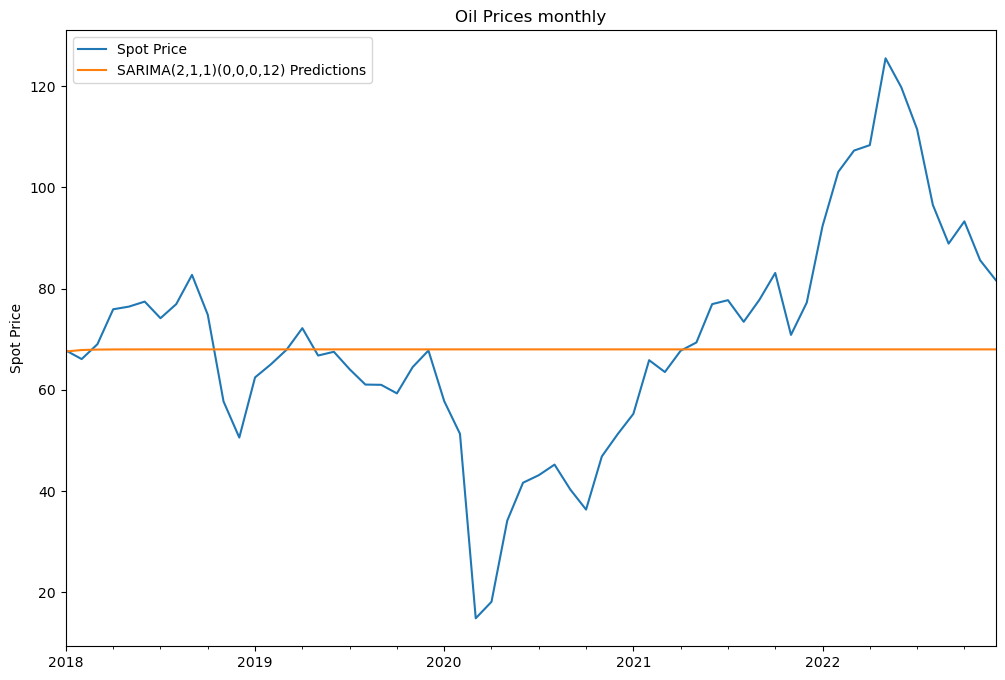

In [494]:
# Plot predictions against known values
title = 'Oil Prices monthly'
ylabel='Spot Price'
xlabel=''

ax = test1['Spot Price'].plot(legend=True,figsize=(12,8),title=title)
predictions1.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Evaluate the Model

In [497]:
error = mean_squared_error(test1['Spot Price'], predictions1)
print(f'SARIMA(2,1,1)(0,0,0,12) MSE Error: {error:11.10}')

SARIMA(2,1,1)(0,0,0,12) MSE Error: 475.5767592


In [498]:
error = rmse(test1['Spot Price'], predictions1)
print(f'SARIMA(2,1,1)(0,0,0,12) RMSE Error: {error:11.10}')

SARIMA(2,1,1)(0,0,0,12) RMSE Error: 21.80772247


### Forecasting the future

In [501]:
model = SARIMAX(oil4['Spot Price'],order=(2,1,1),seasonal_order=(0,0,0,12))
results = model.fit()
fcast = results.predict(len(oil4),len(oil4)+23,typ='levels').rename('SARIMA(2,1,1)(0,0,0,12) Forecast')

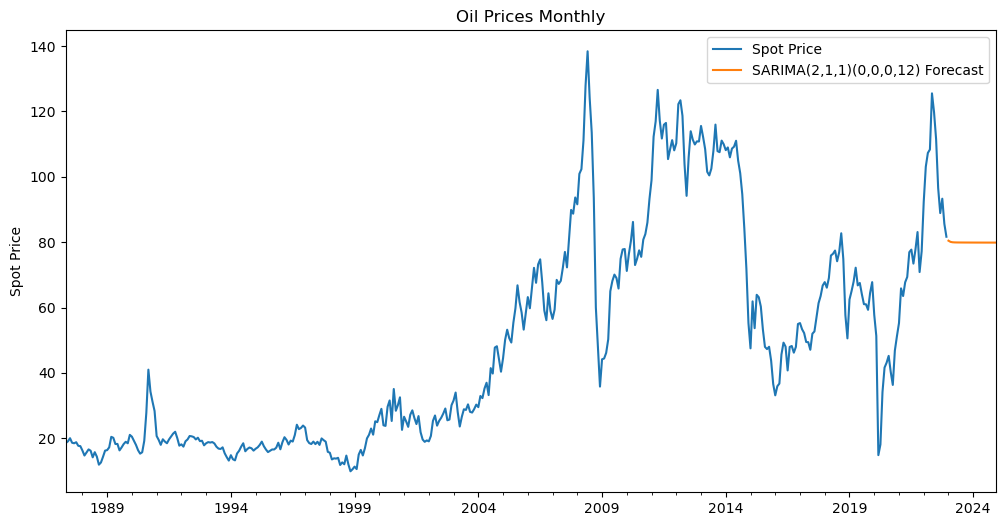

In [503]:
title = 'Oil Prices Monthly'
ylabel='Spot Price'
xlabel=''

ax = oil4['Spot Price'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

# DEEP LEARNING MODEL
## Long Term Short Term Memory(LSTM)

### DATA SCALING

In [607]:
train2 = oil4.iloc[:368]
test2 = oil4.iloc[368:]

In [608]:
from sklearn.preprocessing import MinMaxScaler

In [609]:
scaler = MinMaxScaler()
scaler.fit(train2)

MinMaxScaler()

In [610]:
scaled_train = scaler.transform(train2)
scaled_test = scaler.transform(test2)

## Time Series Generator

In [552]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [611]:
scaled_train

array([[0.06747607],
       [0.07136742],
       [0.07876099],
       [0.0678652 ],
       [0.0666978 ],
       [0.06918826],
       [0.06062729],
       [0.05984902],
       [0.04957584],
       [0.03751265],
       [0.04467274],
       [0.05206631],
       [0.04895323],
       [0.03323216],
       [0.04545101],
       [0.03494435],
       [0.01572107],
       [0.02093548],
       [0.03455522],
       [0.04918671],
       [0.05035411],
       [0.05696941],
       [0.08202973],
       [0.07969492],
       [0.06490777],
       [0.06514126],
       [0.0497315 ],
       [0.05673593],
       [0.06475212],
       [0.07020002],
       [0.0666978 ],
       [0.08669935],
       [0.08241887],
       [0.07230135],
       [0.06257296],
       [0.05012063],
       [0.04194879],
       [0.04529535],
       [0.07253483],
       [0.13923263],
       [0.24196436],
       [0.18982022],
       [0.16569383],
       [0.14351311],
       [0.08397541],
       [0.07463616],
       [0.0629621 ],
       [0.076

In [612]:
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [613]:
len(scaled_train)

368

In [614]:
len(generator)

366

In [615]:
# What does the first batch look like?
X,y = generator[0]

In [616]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.06747607 0.07136742]
Predict this y: 
 [[0.07876099]]


In [617]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [618]:
X,y = generator[0]

In [619]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.06747607 0.07136742 0.07876099 0.0678652  0.0666978  0.06918826
 0.06062729 0.05984902 0.04957584 0.03751265 0.04467274 0.05206631]
Predict this y: 
 [[0.04895323]]


## Creating The Model

In [562]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [620]:
# define model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [621]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 150)               91200     
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [622]:
# fit model
model.fit_generator(generator,epochs=50)

Epoch 1/50
356/356 [==============================] - 3s 5ms/step - loss: 0.0163
Epoch 2/50
356/356 [==============================] - 2s 5ms/step - loss: 0.0070
Epoch 3/50
356/356 [==============================] - 2s 5ms/step - loss: 0.0058
Epoch 4/50
356/356 [==============================] - 2s 5ms/step - loss: 0.0051
Epoch 5/50
356/356 [==============================] - 2s 5ms/step - loss: 0.0042
Epoch 6/50
356/356 [==============================] - 2s 5ms/step - loss: 0.0043
Epoch 7/50
356/356 [==============================] - 2s 6ms/step - loss: 0.0036
Epoch 8/50
356/356 [==============================] - 2s 5ms/step - loss: 0.0032
Epoch 9/50
356/356 [==============================] - 2s 5ms/step - loss: 0.0029
Epoch 10/50
356/356 [==============================] - 2s 5ms/step - loss: 0.0023
Epoch 11/50
356/356 [==============================] - 2s 5ms/step - loss: 0.0023
Epoch 12/50
356/356 [==============================] - 2s 5ms/step - loss: 0.0021
Epoch 13/50
356/356 [====

In [623]:
model.history.history.keys()

dict_keys(['loss'])

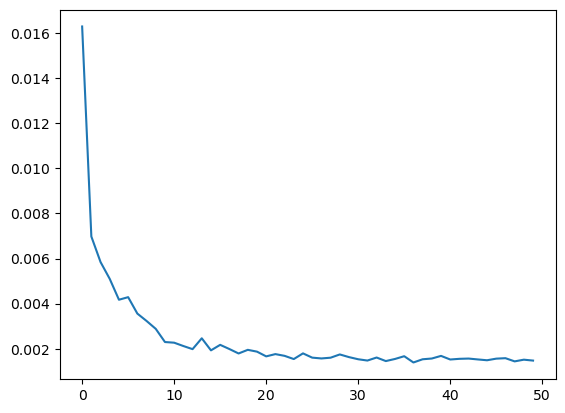

In [624]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaluate On Test Data

In [625]:
first_eval_batch = scaled_train[-12:]

In [626]:
first_eval_batch

array([[0.35286793],
       [0.33815861],
       [0.32913067],
       [0.30780605],
       [0.30733909],
       [0.28928321],
       [0.3274963 ],
       [0.3329442 ],
       [0.36664332],
       [0.40034244],
       [0.41730874],
       [0.4422134 ]])

In [627]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [628]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 200ms/step


array([[0.47241122]], dtype=float32)

In [629]:
scaled_test[0]

array([0.45038524])

### Putting this logic in a for loop to predict into the future for the entire test range.

In [630]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [631]:
current_batch.shape

(1, 12, 1)

In [632]:
current_batch

array([[[0.35286793],
        [0.33815861],
        [0.32913067],
        [0.30780605],
        [0.30733909],
        [0.28928321],
        [0.3274963 ],
        [0.3329442 ],
        [0.36664332],
        [0.40034244],
        [0.41730874],
        [0.4422134 ]]])

In [633]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.33815861],
        [ 0.32913067],
        [ 0.30780605],
        [ 0.30733909],
        [ 0.28928321],
        [ 0.3274963 ],
        [ 0.3329442 ],
        [ 0.36664332],
        [ 0.40034244],
        [ 0.41730874],
        [ 0.4422134 ],
        [99.        ]]])

In [644]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test2)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 21ms/step


In [645]:
test_predictions

[array([0.47241122], dtype=float32),
 array([0.5034019], dtype=float32),
 array([0.53542614], dtype=float32),
 array([0.56959313], dtype=float32),
 array([0.60660756], dtype=float32),
 array([0.6459555], dtype=float32),
 array([0.6858022], dtype=float32),
 array([0.7241007], dtype=float32),
 array([0.7589974], dtype=float32),
 array([0.7887315], dtype=float32),
 array([0.8117732], dtype=float32),
 array([0.8272827], dtype=float32),
 array([0.83539224], dtype=float32),
 array([0.8373617], dtype=float32),
 array([0.8354401], dtype=float32),
 array([0.832069], dtype=float32),
 array([0.8291076], dtype=float32),
 array([0.8278308], dtype=float32),
 array([0.82877123], dtype=float32),
 array([0.83180404], dtype=float32),
 array([0.83629286], dtype=float32),
 array([0.8413419], dtype=float32),
 array([0.84605074], dtype=float32),
 array([0.84967667], dtype=float32),
 array([0.8517787], dtype=float32),
 array([0.8522521], dtype=float32),
 array([0.8513075], dtype=float32),
 array([0.8493904],

In [646]:
test_predictions

[array([0.47241122], dtype=float32),
 array([0.5034019], dtype=float32),
 array([0.53542614], dtype=float32),
 array([0.56959313], dtype=float32),
 array([0.60660756], dtype=float32),
 array([0.6459555], dtype=float32),
 array([0.6858022], dtype=float32),
 array([0.7241007], dtype=float32),
 array([0.7589974], dtype=float32),
 array([0.7887315], dtype=float32),
 array([0.8117732], dtype=float32),
 array([0.8272827], dtype=float32),
 array([0.83539224], dtype=float32),
 array([0.8373617], dtype=float32),
 array([0.8354401], dtype=float32),
 array([0.832069], dtype=float32),
 array([0.8291076], dtype=float32),
 array([0.8278308], dtype=float32),
 array([0.82877123], dtype=float32),
 array([0.83180404], dtype=float32),
 array([0.83629286], dtype=float32),
 array([0.8413419], dtype=float32),
 array([0.84605074], dtype=float32),
 array([0.84967667], dtype=float32),
 array([0.8517787], dtype=float32),
 array([0.8522521], dtype=float32),
 array([0.8513075], dtype=float32),
 array([0.8493904],

In [647]:
scaled_test

array([[0.45038524],
       [0.43715464],
       [0.4600358 ],
       [0.51373648],
       [0.51786131],
       [0.52556619],
       [0.50003891],
       [0.52167484],
       [0.56665888],
       [0.50533115],
       [0.37201339],
       [0.31644486],
       [0.40898124],
       [0.4289828 ],
       [0.45155265],
       [0.48470698],
       [0.44260254],
       [0.44836174],
       [0.4215114 ],
       [0.3979298 ],
       [0.39754066],
       [0.38438789],
       [0.42485797],
       [0.45030742],
       [0.37248035],
       [0.32220406],
       [0.03844657],
       [0.0638182 ],
       [0.18865281],
       [0.24694529],
       [0.25854152],
       [0.27480738],
       [0.23651646],
       [0.20561911],
       [0.28741536],
       [0.32150362],
       [0.35286793],
       [0.43544245],
       [0.41723091],
       [0.44999611],
       [0.46268192],
       [0.52167484],
       [0.52774535],
       [0.49451319],
       [0.52844579],
       [0.56961631],
       [0.47435598],
       [0.524

## Inverse Transformations and Compare

In [648]:
true_predictions = scaler.inverse_transform(test_predictions)

In [649]:
true_predictions

array([[ 70.61011705],
       [ 74.59210698],
       [ 78.70690471],
       [ 83.09702147],
       [ 87.85300491],
       [ 92.90882258],
       [ 98.02872741],
       [102.94970009],
       [107.43357345],
       [111.25411241],
       [114.21473602],
       [116.20755756],
       [117.24954849],
       [117.50260398],
       [117.25569835],
       [116.82254321],
       [116.44203328],
       [116.2779784 ],
       [116.3988158 ],
       [116.78850073],
       [117.36526995],
       [118.01402237],
       [118.61905949],
       [119.08495515],
       [119.35504337],
       [119.41587564],
       [119.29450213],
       [119.04817089],
       [118.74659051],
       [118.45991377],
       [118.24528148],
       [118.13179633],
       [118.12288938],
       [118.20175765],
       [118.33749869],
       [118.49383371],
       [118.63679681],
       [118.74076232],
       [118.79223577],
       [118.79026751],
       [118.74449206],
       [118.67148261],
       [118.59040101],
       [118

In [651]:
test2

,Spot Price
Date,
2018-01-31,67.78
2018-02-28,66.08
2018-03-30,69.02
2018-04-30,75.92
2018-05-31,76.45
2018-06-29,77.44
2018-07-31,74.16
2018-08-31,76.94
2018-09-28,82.72


In [664]:
test2['Predictions3'] = true_predictions

In [668]:
test2

,Spot Price,Predictions3
Date,,
2018-01-31,67.78,70.610117
2018-02-28,66.08,74.592107
2018-03-30,69.02,78.706905
2018-04-30,75.92,83.097021
2018-05-31,76.45,87.853005
2018-06-29,77.44,92.908823
2018-07-31,74.16,98.028727
2018-08-31,76.94,102.949700
2018-09-28,82.72,107.433573


<AxesSubplot:xlabel='Date'>

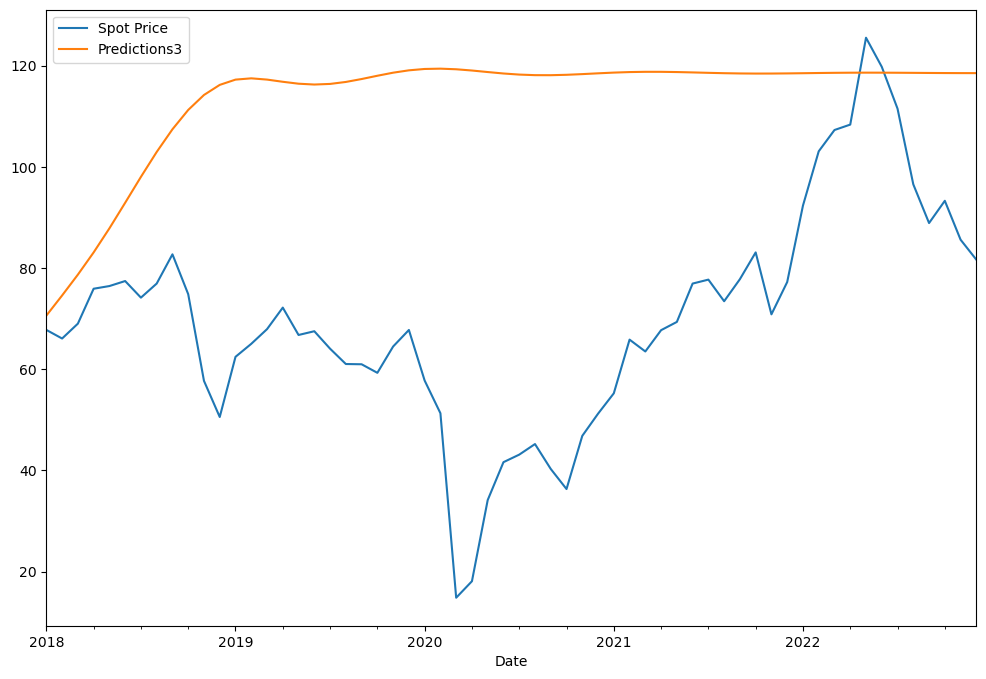

In [669]:
test2.plot(figsize=(12,8))

## Evaluate the Model

In [680]:
error1 = mean_squared_error(test2['Spot Price'],test2['Predictions3'])

In [681]:
error

475.5767591756716

In [682]:
error2 = rmse(test2['Spot Price'], test2['Predictions3'])

In [683]:
error2

50.53186344656358

# FB PROPHET MODEL

In [688]:
import prophet
from prophet import Prophet

In [841]:
tsf = pd.read_excel('C:\\Users\\DELL\\OneDrive\\Desktop\\VIVEK DS PROJECTS\\Brent crude oil(daily).xlsx',parse_dates=True)

In [842]:
tsf

,Date,Spot Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9029,2022-12-13,80.14
9030,2022-12-14,83.33
9031,2022-12-15,82.34
9032,2022-12-16,80.20


## Format the Data

In [843]:
tsf.columns = ['ds','y']

In [844]:
tsf['ds'] = pd.to_datetime(tsf['ds'])

## Creating and Fitting Model

In [845]:
m = Prophet()
m.fit(tsf)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


## Forecasting
### Creating "future" placeholder dataframe

In [846]:
future = m.make_future_dataframe(periods=24,freq = 'BM')

In [847]:
tsf.tail()

,ds,y
9029,2022-12-13,80.14
9030,2022-12-14,83.33
9031,2022-12-15,82.34
9032,2022-12-16,80.20
9033,2022-12-19,81.66


In [848]:
future.tail()

,ds
9053,2024-07-31
9054,2024-08-30
9055,2024-09-30
9056,2024-10-31
9057,2024-11-29


In [849]:
len(tsf)

9034

In [850]:
len(future)

9058

## Predict and fill in the Future

In [851]:
forecast = m.predict(future)

In [852]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1987-05-20,15.936561,2.696854,31.186833,15.936561,15.936561,0.974000,0.974000,0.974000,-0.526691,-0.526691,-0.526691,1.500691,1.500691,1.500691,0.0,0.0,0.0,16.910561
1,1987-05-21,15.940937,3.355342,30.967419,15.940937,15.940937,1.125661,1.125661,1.125661,-0.407539,-0.407539,-0.407539,1.533200,1.533200,1.533200,0.0,0.0,0.0,17.066598
2,1987-05-22,15.945314,2.912278,31.784536,15.945314,15.945314,1.107453,1.107453,1.107453,-0.453400,-0.453400,-0.453400,1.560853,1.560853,1.560853,0.0,0.0,0.0,17.052767
3,1987-05-25,15.958444,2.497102,31.724271,15.958444,15.958444,1.173952,1.173952,1.173952,-0.441092,-0.441092,-0.441092,1.615044,1.615044,1.615044,0.0,0.0,0.0,17.132396
4,1987-05-26,15.962821,3.499358,31.529419,15.962821,15.962821,1.073001,1.073001,1.073001,-0.551047,-0.551047,-0.551047,1.624048,1.624048,1.624048,0.0,0.0,0.0,17.035822


In [853]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
9053,2024-07-31,94.284922,77.580900,113.084712,84.354923,103.630547,0.950728,0.950728,0.950728,-0.526691,-0.526691,-0.526691,1.477419,1.477419,1.477419,0.0,0.0,0.0,95.235650
9054,2024-08-30,94.764082,77.313943,112.700157,83.922940,104.736511,0.753990,0.753990,0.753990,-0.453400,-0.453400,-0.453400,1.207390,1.207390,1.207390,0.0,0.0,0.0,95.518072
9055,2024-09-30,95.259214,75.809977,113.967716,83.455017,106.184437,0.230904,0.230904,0.230904,-0.441092,-0.441092,-0.441092,0.671996,0.671996,0.671996,0.0,0.0,0.0,95.490117
9056,2024-10-31,95.754346,73.122638,113.648769,82.938910,107.698092,-0.853929,-0.853929,-0.853929,-0.407539,-0.407539,-0.407539,-0.446390,-0.446390,-0.446390,0.0,0.0,0.0,94.900417
9057,2024-11-29,96.217534,73.343545,112.713128,82.305221,108.622193,-2.360565,-2.360565,-2.360565,-0.453400,-0.453400,-0.453400,-1.907165,-1.907165,-1.907165,0.0,0.0,0.0,93.856969


In [854]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [855]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
9046,2023-12-29,87.750709,73.528864,102.024656
9047,2024-01-31,88.754047,71.992181,104.926159
9048,2024-02-29,91.662367,75.438131,106.813467
9049,2024-03-29,91.452878,74.971610,107.305747
9050,2024-04-30,92.755190,76.804428,109.533745
9051,2024-05-31,94.465723,76.889961,111.294709
9052,2024-06-28,94.864547,76.715163,111.697604
9053,2024-07-31,95.235650,77.580900,113.084712
9054,2024-08-30,95.518072,77.313943,112.700157
9055,2024-09-30,95.490117,75.809977,113.967716


## Plotting Forecast

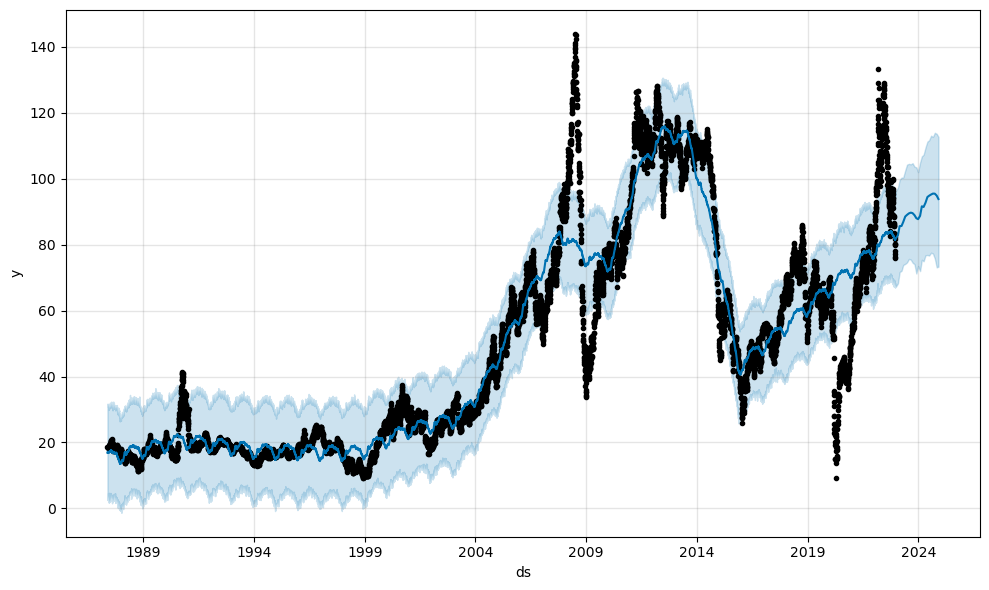

In [856]:
m.plot(forecast);

(12784.0, 18993.0)

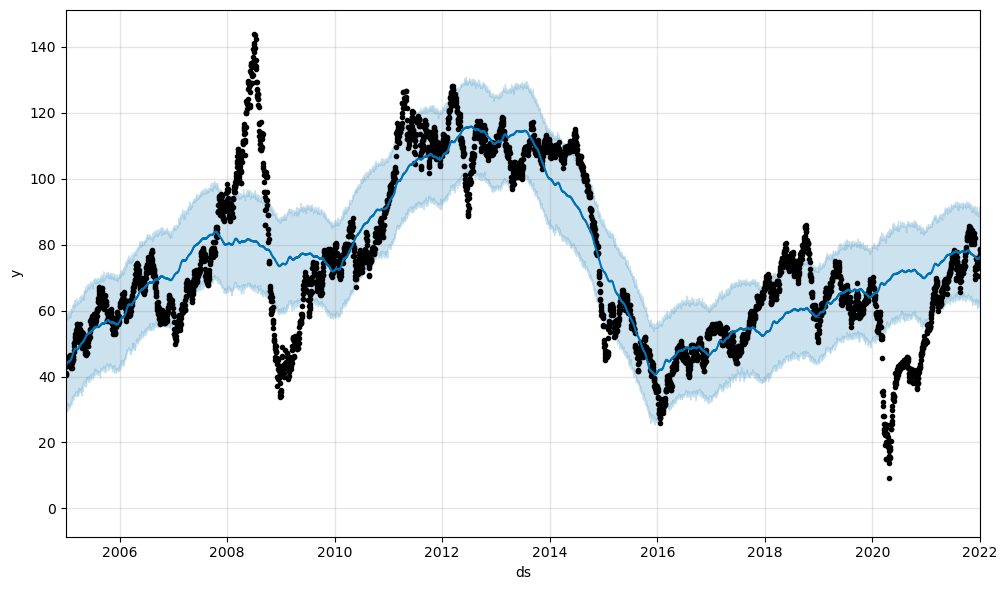

In [857]:
import matplotlib.pyplot as plt
start_date = pd.to_datetime('2005-01-01')
end_date = pd.to_datetime('2022-01-01')


m.plot(forecast)
plt.xlim(start_date, end_date)

<AxesSubplot:xlabel='ds'>

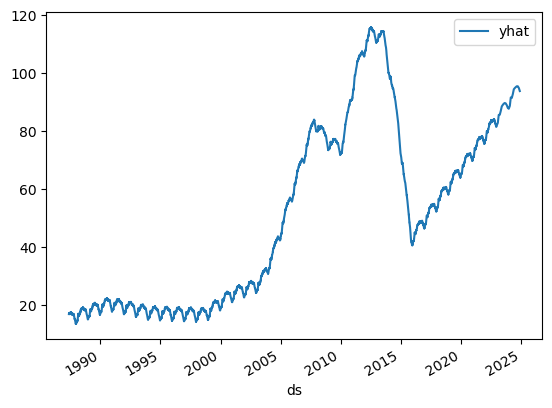

In [858]:
forecast.plot(x='ds',y='yhat')

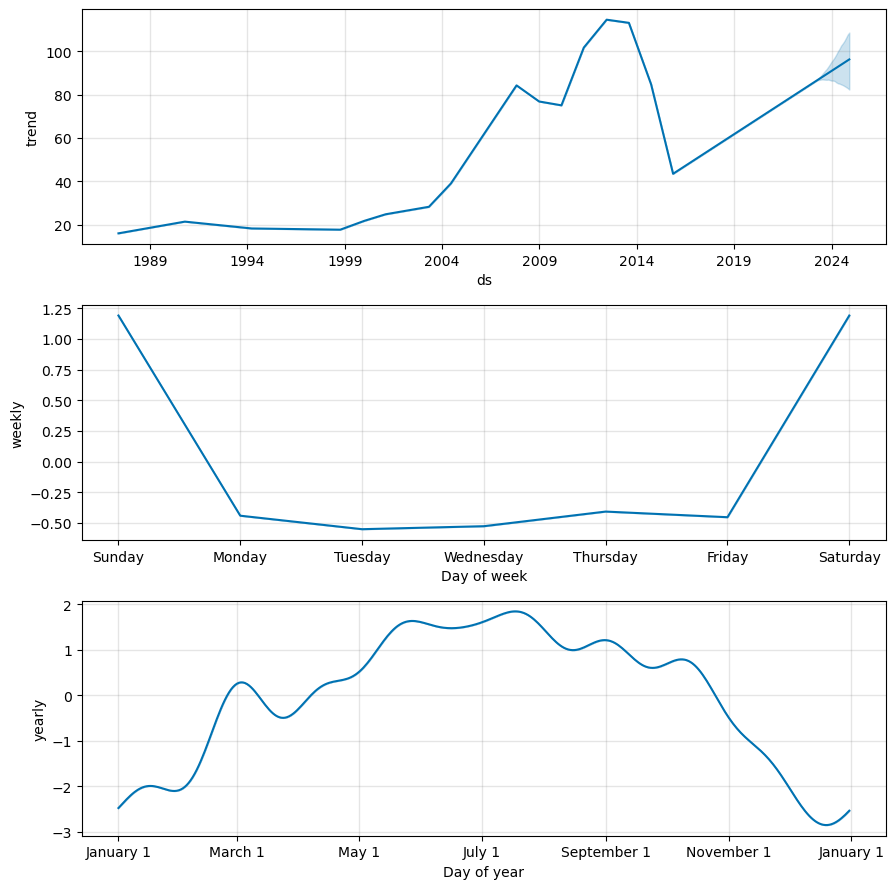

In [859]:
m.plot_components(forecast);


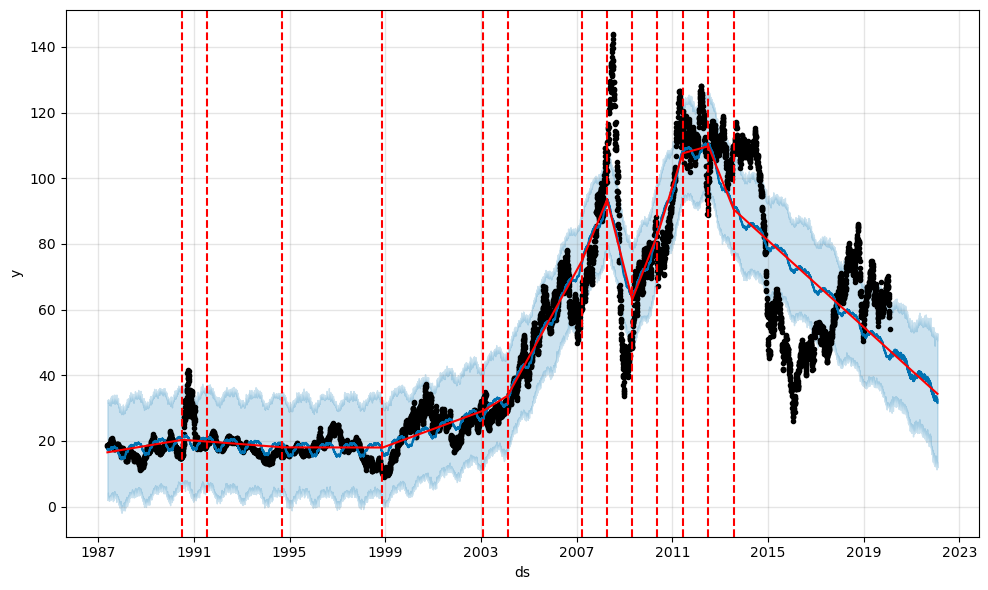

In [907]:
from prophet.plot import add_changepoints_to_plot
fig = m1.plot(forecast1)
a = add_changepoints_to_plot(fig.gca(), m1, forecast1)

# Forecast Evaluations

In [860]:
len(tsf)

9034

In [861]:
len(tsf)-(365*2)

8304

In [864]:
fbtrain = tsf.iloc[:8304]
fbtest = tsf.iloc[8304:]

In [878]:
m1 = Prophet()
m1.fit(fbtrain)
future1 = m1.make_future_dataframe(periods=365*2,freq='D')
forecast1 = m1.predict(future1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [884]:
forecast1.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
9029,2022-01-29,34.420238,12.987601,52.684828,22.910550,46.899340,-1.572062,-1.572062,-1.572062,0.759245,0.759245,0.759245,-2.331308,-2.331308,-2.331308,0.0,0.0,0.0,32.848176
9030,2022-01-30,34.402195,13.531369,52.843003,22.856923,46.911994,-1.587739,-1.587739,-1.587739,0.759245,0.759245,0.759245,-2.346984,-2.346984,-2.346984,0.0,0.0,0.0,32.814456
9031,2022-01-31,34.384151,13.381006,50.653553,22.803297,46.927636,-2.612064,-2.612064,-2.612064,-0.254668,-0.254668,-0.254668,-2.357396,-2.357396,-2.357396,0.0,0.0,0.0,31.772087
9032,2022-02-01,34.366107,12.026106,52.460720,22.747205,46.980097,-2.730636,-2.730636,-2.730636,-0.368603,-0.368603,-0.368603,-2.362033,-2.362033,-2.362033,0.0,0.0,0.0,31.635471
9033,2022-02-02,34.348064,12.242169,51.855034,22.685769,47.017175,-2.751464,-2.751464,-2.751464,-0.390992,-0.390992,-0.390992,-2.360472,-2.360472,-2.360472,0.0,0.0,0.0,31.596600


In [881]:
fbtest.tail()

,ds,y
9029,2022-12-13,80.14
9030,2022-12-14,83.33
9031,2022-12-15,82.34
9032,2022-12-16,80.20
9033,2022-12-19,81.66


<AxesSubplot:xlabel='ds'>

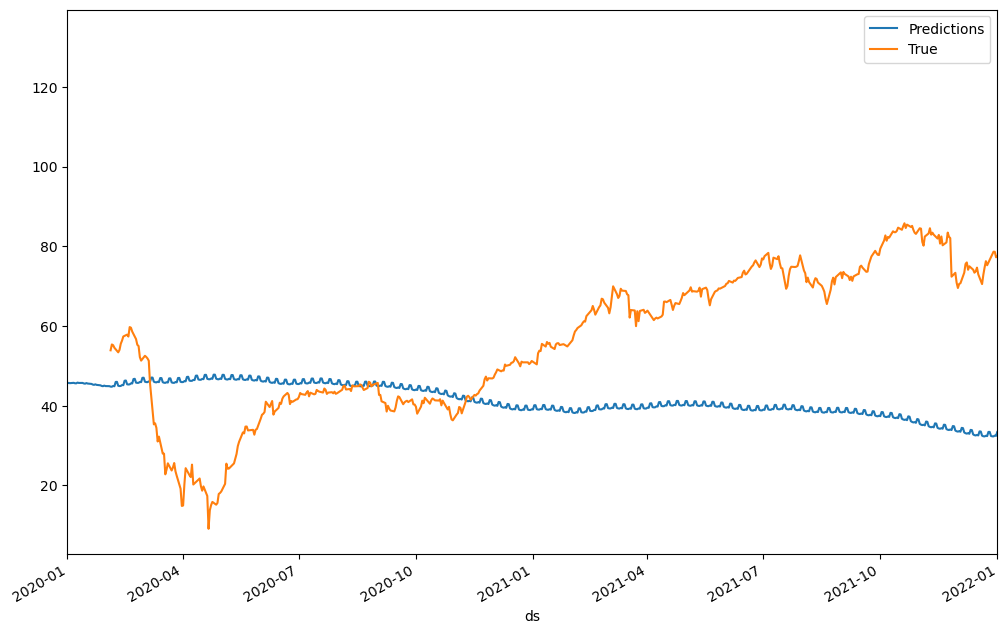

In [886]:
ax = forecast1.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

fbtest.plot(x='ds',y='y',label='True',legend=True,ax=ax,xlim=('2020-01-01','2022-01-01'))

In [827]:
from statsmodels.tools.eval_measures import rmse

In [887]:
365*2

730

In [888]:
fbpredictions = forecast1.iloc[-730:]['yhat']

In [889]:
fbpredictions

8304    44.787441
8305    44.765309
8306    44.953290
8307    44.883544
8308    45.957689
          ...    
9029    32.848176
9030    32.814456
9031    31.772087
9032    31.635471
9033    31.596600
Name: yhat, Length: 730, dtype: float64

In [890]:
fbtest['y']

8304    53.90
8305    55.36
8306    55.18
8307    54.53
8308    53.39
        ...  
9029    80.14
9030    83.33
9031    82.34
9032    80.20
9033    81.66
Name: y, Length: 730, dtype: float64

In [891]:
rmse(fbpredictions,fbtest['y'])

43.133465339335956

In [892]:
fbtest.mean()

y    71.286
dtype: float64

In [893]:
mean_squared_error(fbpredictions,fbtest['y'])

1860.4958321796962

# CROSS VALIDATION
Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values.

In [895]:
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [897]:
len(tsf)/(365*2)

12.375342465753425

In [898]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 5 years
period = 5 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [899]:
df_cv = cross_validation(m1, initial=initial, period=period, horizon = horizon)

INFO:prophet:Making 6 forecasts with cutoffs between 1994-02-09 00:00:00 and 2019-02-03 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [900]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1994-02-10,14.066762,11.850396,16.250909,13.58,1994-02-09
1,1994-02-11,14.050086,11.661281,16.390661,13.70,1994-02-09
2,1994-02-14,13.936090,11.812770,16.299971,13.40,1994-02-09
3,1994-02-15,13.888102,11.614996,16.235130,13.13,1994-02-09
4,1994-02-16,13.842614,11.614040,16.057958,13.08,1994-02-09


In [901]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
1518,2020-01-28,30.536827,14.331615,46.210933,59.37,2019-02-03
1519,2020-01-29,30.504761,15.407848,47.711331,59.46,2019-02-03
1520,2020-01-30,30.633673,15.738467,46.171560,57.72,2019-02-03
1521,2020-01-31,30.472168,15.160419,46.759662,57.77,2019-02-03
1522,2020-02-03,30.332358,13.780591,46.197258,54.00,2019-02-03


In [902]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,566.224029,23.795462,15.310729,0.335225,0.178760,0.280437,0.467105
1,37 days,551.871965,23.491955,15.092808,0.331569,0.181294,0.280053,0.460526
2,38 days,554.516203,23.548168,15.239997,0.335575,0.183836,0.284914,0.446053
3,39 days,574.473014,23.968167,15.641672,0.346326,0.193392,0.293447,0.425987
4,40 days,582.601940,24.137149,15.797428,0.349761,0.199746,0.296103,0.417763
...,...,...,...,...,...,...,...,...
325,361 days,1309.741164,36.190346,29.204364,0.645196,0.474001,0.683131,0.164474
326,362 days,1309.518424,36.187269,29.239820,0.643213,0.471044,0.677347,0.164474
327,363 days,1315.950701,36.276035,29.258000,0.642970,0.459731,0.672549,0.171053
328,364 days,1338.571840,36.586498,29.462494,0.652050,0.471044,0.680628,0.177632


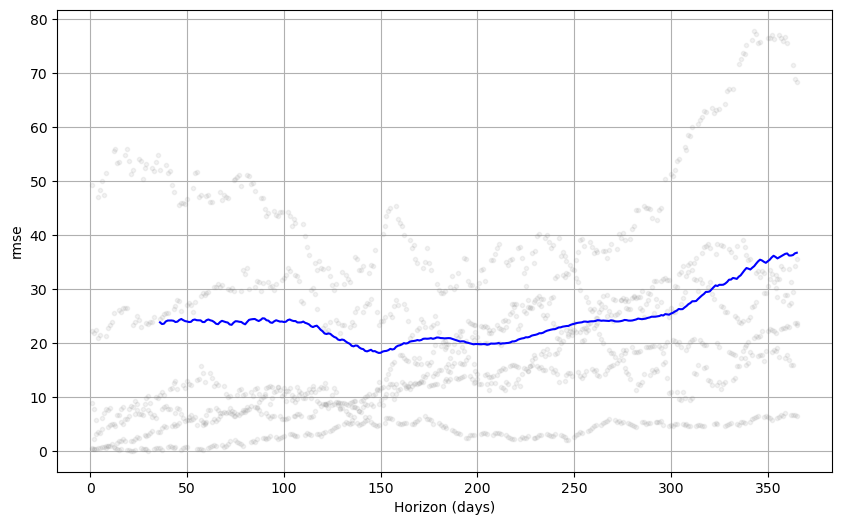

In [903]:
plot_cross_validation_metric(df_cv, metric='rmse');

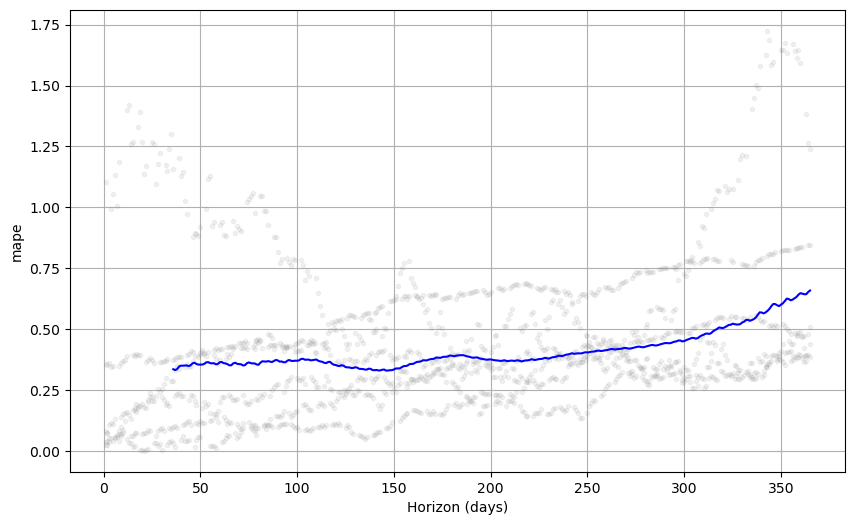

In [908]:
plot_cross_validation_metric(df_cv, metric='mape');

In [909]:
import pickle

In [910]:
with open('fbprophet.pickle', 'wb') as file:
    pickle.dump(m1, file)

In [2]:
import pandas as pd
(pd. __version__)

'1.4.2'